<center>

## **PROYEK AKHIR KASDD**

### Kelompok KASPAPI

#### Anggota:
1. Mahira Irgiani - 2206027375
2. Nadhira Widyaniswari - 2206811884
3. Raisa Diandra Survijanto - 2206814545
4. Sayyid Hafidzurrahman Atstsaqofi - 2106651925
</center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import and Read Dataset

Dataset merupakan *Pregnancy Mental Health*. Dataset ini bertujuan untuk memahami dampak tekanan terkait COVID-19 terhadap individu hamil dan bayinya serta mengumpulkan data berbasis survei di seluruh Kanada sebagai bagian dari proyek Kehamilan selama Pandemi COVID-19 (PdP).

Dataset ini memiliki 16 kolom, yaitu:
- id: *Unique Identifier*
- maternal_age: Usia ibu (dalam tahun) saat pendaftaran
- household_income: Total pendapatan rumah tangga sebelum pajak & potongan, dari seluruh anggota rumah tangga dari semua sumber pada tahun 2019
- maternal_education: Pendidikan ibu
- edinburgh_postnatal_depression_scale: Edinburgh Postnatal Depression Scale (EPDS)
- promis_anxiety: Skor antara 7 hingga 35 dengan skor yang lebih tinggi menunjukkan tingkat kecemasan yang lebih tinggi
- gestational_age_at_birth: Usia kehamilan saat lahir (dalam minggu)
- delivery_date: Tanggal persalinan (Tanggal dikonversi menjadi bulan/tahun kelahiran)
- birth_length: Panjang bayi saat lahir dalam cm
- birth_weight: Berat bayi saat lahir dalam grams
- delivery_mode: Persalinan secara normal atau melalui operasi caesar (c-section)?
- nicu_stay: Apakah bayinya masuk ke NICU?
- language: Bahasa yang digunakan
- threaten_life: Seberapa besar Anda berpikir bahwa hidup Anda berada dalam bahaya selama pandemi COVID-19? (0-100)
- threaten_baby_danger: Seberapa besar Anda berpikir bahwa hidup calon bayimu berada dalam bahaya selama pandemi COVID-19? (0-100)
- threaten_baby_harm: Seberapa khawatir anda bahwa terpaparnya virus COVID-19 dapat menyakiti calon bayimu? (0-100)

In [2]:
# import library dan data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

In [3]:
# read dataset
file_link = "https://drive.google.com/uc?id=1of5-u9W4X35GHb-z9v7VyoJvnv_IvpzK"

# Membaca file CSV
train = pd.read_csv(file_link)


train.head()

,id,maternal_age,household_income,maternal_education,edinburgh_postnatal_depression_scale,promis_anxiety,gestational_age_at_birth,delivery_date,birth_length,birth_weight,nicu_stay,language,threaten_life,threaten_baby_danger,threaten_baby_harm,delivery_mode
0,0,31.8,"$125,000- $149,999",Masters degree,6.0,11.0,39.29,Oct2020,47.00,3374.0,No,English,5,29,51,Vaginally
1,1,34.3,"$100,000 -$124,999",Undergraduate degree,13.0,23.0,40.86,Jan2021,50.00,3005.0,No,English,66,83,86,Vaginally
2,2,29.3,"$100,000 -$124,999",Masters degree,12.0,23.0,40.86,Jul2020,55.00,4338.0,No,English,25,48,49,Vaginally
3,3,32.7,"$125,000- $149,999",Undergraduate degree,16.0,25.0,39.57,May2020,51.44,3232.0,No,English,71,73,59,Vaginally
4,4,29.6,"$125,000- $149,999",College/trade school,19.0,28.0,37.71,Nov2020,51.00,3260.0,No,English,100,81,91,Caesarean-section (c-section)


In [4]:
# mengecek jumlah baris dan kolom
print("Jumlah baris : ", train.shape[0])
print("Jumlah kolom : ", train.shape[1])

Jumlah baris :  4705
Jumlah kolom :  16


In [5]:
# melihat informasi dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    4705 non-null   int64  
 1   maternal_age                          4693 non-null   float64
 2   household_income                      4628 non-null   object 
 3   maternal_education                    4645 non-null   object 
 4   edinburgh_postnatal_depression_scale  4448 non-null   float64
 5   promis_anxiety                        4441 non-null   float64
 6   gestational_age_at_birth              4705 non-null   float64
 7   delivery_date                         4705 non-null   object 
 8   birth_length                          4665 non-null   float64
 9   birth_weight                          4702 non-null   float64
 10  nicu_stay                             4703 non-null   object 
 11  language         

### Data Preprocessing

In [6]:
# drop kolom id karena tidak dibutuhkan dalam mengolah data
train = train.drop(['id'], axis=1)

train.head()

,maternal_age,household_income,maternal_education,edinburgh_postnatal_depression_scale,promis_anxiety,gestational_age_at_birth,delivery_date,birth_length,birth_weight,nicu_stay,language,threaten_life,threaten_baby_danger,threaten_baby_harm,delivery_mode
0,31.8,"$125,000- $149,999",Masters degree,6.0,11.0,39.29,Oct2020,47.00,3374.0,No,English,5,29,51,Vaginally
1,34.3,"$100,000 -$124,999",Undergraduate degree,13.0,23.0,40.86,Jan2021,50.00,3005.0,No,English,66,83,86,Vaginally
2,29.3,"$100,000 -$124,999",Masters degree,12.0,23.0,40.86,Jul2020,55.00,4338.0,No,English,25,48,49,Vaginally
3,32.7,"$125,000- $149,999",Undergraduate degree,16.0,25.0,39.57,May2020,51.44,3232.0,No,English,71,73,59,Vaginally
4,29.6,"$125,000- $149,999",College/trade school,19.0,28.0,37.71,Nov2020,51.00,3260.0,No,English,100,81,91,Caesarean-section (c-section)


#### Missing Data dan Baris Duplikat

In [7]:
# mengecek keberadaan missing data dan baris yang duplikat
missing_values = train.isnull().sum()
duplicated_count = train.duplicated().sum()

print("MISSING VALUES INFORMATION:\n", missing_values, "\n\nDUPLICATED ROWS COUNT:\n", duplicated_count)

MISSING VALUES INFORMATION:
 maternal_age                             12
household_income                         77
maternal_education                       60
edinburgh_postnatal_depression_scale    257
promis_anxiety                          264
gestational_age_at_birth                  0
delivery_date                             0
birth_length                             40
birth_weight                              3
nicu_stay                                 2
language                                  0
threaten_life                             0
threaten_baby_danger                      0
threaten_baby_harm                        0
delivery_mode                             0
dtype: int64 

DUPLICATED ROWS COUNT:
 0


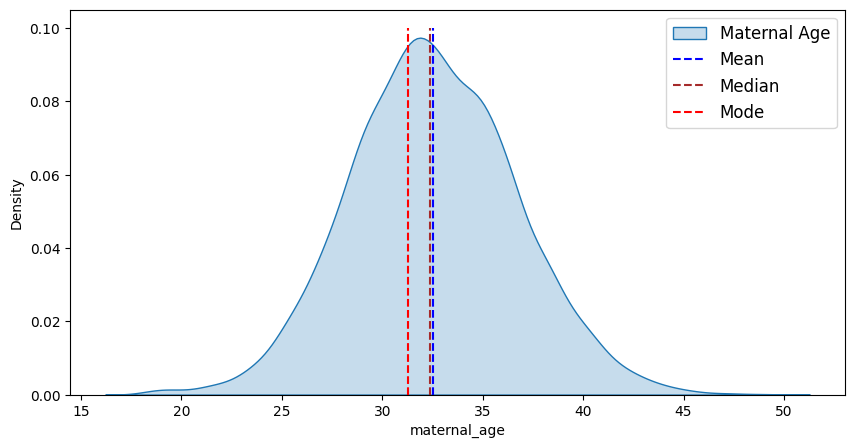

In [8]:
# melihat distribusi data maternal_age untuk memutuskan mengisi missing value dengan apa
maternal_age_arr = train['maternal_age'].dropna()

plt.figure(figsize=(10,5))
sns.kdeplot(maternal_age_arr, fill=True)
plt.vlines(x=np.mean(maternal_age_arr), ymin=0, ymax=0.1, color='blue', linestyle='--')
plt.vlines(x=np.median(maternal_age_arr), ymin=0, ymax=0.1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(maternal_age_arr)[0], ymin=0, ymax=0.1, color='red', linestyle='--')
plt.legend(['Maternal Age', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Dapat dilihat bahwa maternal_age berdistribusi *skewed negatively* karena urutannya adalah mean-median-mode sehingga bisa mengisi *missing value* dengan **median**.

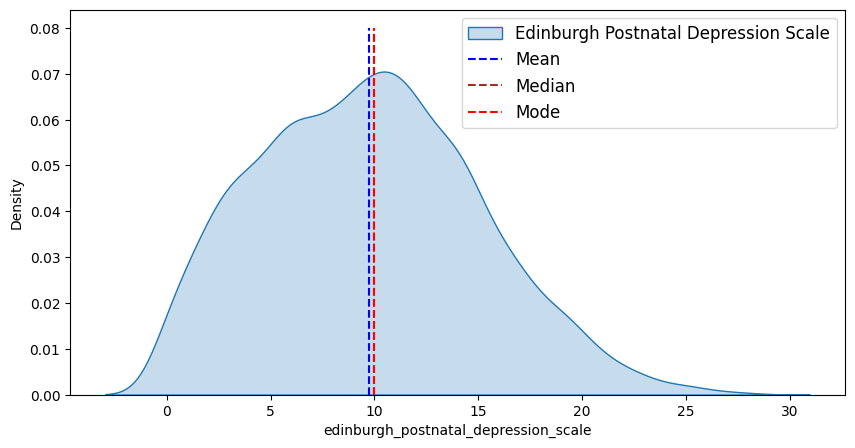

In [9]:
# melihat distribusi data edinburgh_postnatal_depression_scale untuk memutuskan mengisi missing value dengan apa
edinburgh_postnatal_depression_scale_arr = train['edinburgh_postnatal_depression_scale'].dropna()

plt.figure(figsize=(10,5))
sns.kdeplot(edinburgh_postnatal_depression_scale_arr, fill=True)
plt.vlines(x=np.mean(edinburgh_postnatal_depression_scale_arr), ymin=0, ymax=0.08, color='blue', linestyle='--')
plt.vlines(x=np.median(edinburgh_postnatal_depression_scale_arr), ymin=0, ymax=0.08, color='brown', linestyle='--')
plt.vlines(x=scp.mode(edinburgh_postnatal_depression_scale_arr)[0], ymin=0, ymax=0.08, color='red', linestyle='--')
plt.legend(['Edinburgh Postnatal Depression Scale', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Dapat dilihat bahwa edinburgh_postnatal_depression_scale berdistribusi normal sehingga bisa mengisi *missing value* dengan **mean**.

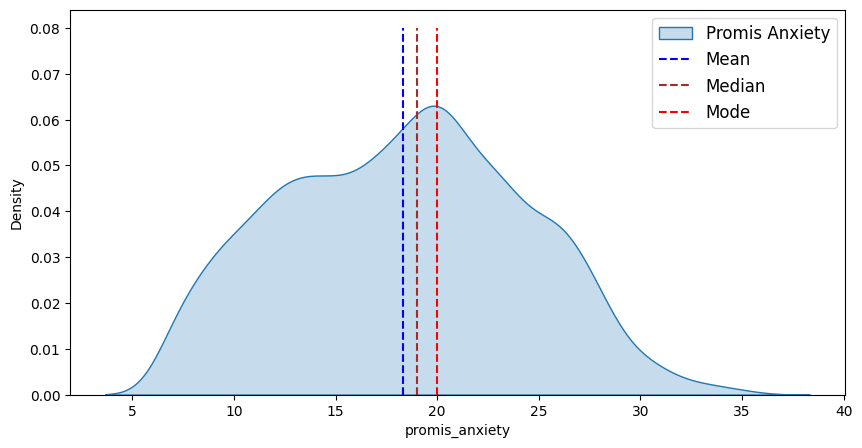

In [10]:
# melihat distribusi data promis_anxiety untuk memutuskan mengisi missing value dengan apa
promis_anxiety_arr = train['promis_anxiety'].dropna()

plt.figure(figsize=(10,5))
sns.kdeplot(promis_anxiety_arr, fill=True)
plt.vlines(x=np.mean(promis_anxiety_arr), ymin=0, ymax=0.08, color='blue', linestyle='--')
plt.vlines(x=np.median(promis_anxiety_arr), ymin=0, ymax=0.08, color='brown', linestyle='--')
plt.vlines(x=scp.mode(promis_anxiety_arr)[0], ymin=0, ymax=0.08, color='red', linestyle='--')
plt.legend(['Promis Anxiety', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Dapat dilihat bahwa promis_anxiety berdistribusi *skewed negatively* karena urutannya adalah mean-median-mode sehingga bisa mengisi *missing value* dengan **median**.

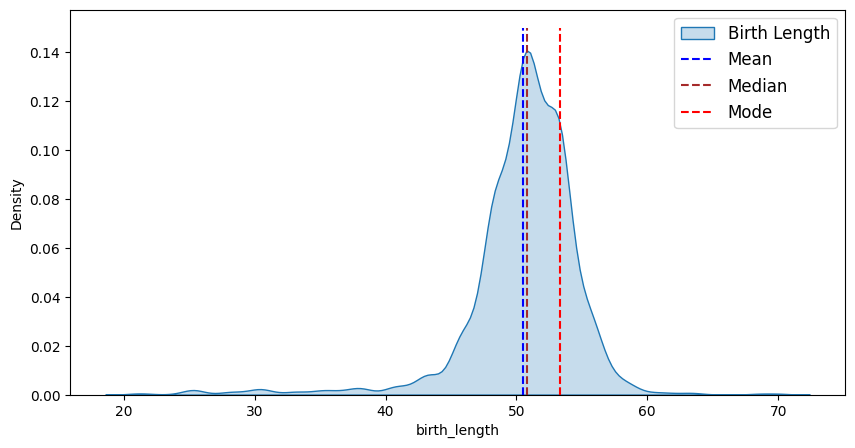

In [11]:
# melihat distribusi data birth_length untuk memutuskan mengisi missing value dengan apa
birth_length_arr = train['birth_length'].dropna()

plt.figure(figsize=(10,5))
sns.kdeplot(birth_length_arr, fill=True)
plt.vlines(x=np.mean(birth_length_arr), ymin=0, ymax=0.15, color='blue', linestyle='--')
plt.vlines(x=np.median(birth_length_arr), ymin=0, ymax=0.15, color='brown', linestyle='--')
plt.vlines(x=scp.mode(birth_length_arr)[0], ymin=0, ymax=0.15, color='red', linestyle='--')
plt.legend(['Birth Length', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Dapat dilihat bahwa birth_length berdistribusi *skewed negatively* karena urutannya adalah mean-median-mode sehingga bisa mengisi *missing value* dengan **median**.

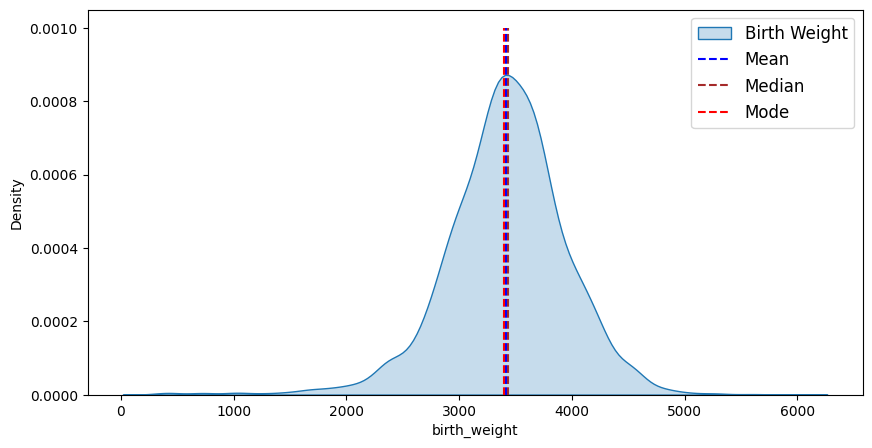

In [12]:
# melihat distribusi data birth_weight untuk memutuskan mengisi missing value dengan apa
birth_weight_arr = train['birth_weight'].dropna()

plt.figure(figsize=(10,5))
sns.kdeplot(birth_weight_arr, fill=True)
plt.vlines(x=np.mean(birth_weight_arr), ymin=0, ymax=0.001, color='blue', linestyle='--')
plt.vlines(x=np.median(birth_weight_arr), ymin=0, ymax=0.001, color='brown', linestyle='--')
plt.vlines(x=scp.mode(birth_weight_arr)[0], ymin=0, ymax=0.001, color='red', linestyle='--')
plt.legend(['Birth Weight', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Dapat dilihat bahwa birth_weight berdistribusi normal sehingga bisa mengisi *missing value* dengan **mean**.

In [13]:
# mengisi missing value berdasarkan data yang telah didapatkan
train['maternal_age'] = train['maternal_age'].fillna(train['maternal_age'].median())
train['household_income'] = train['household_income'].fillna(train['household_income'].mode()[0]) # kategorikal sehingga pakai mode
train['maternal_education'] = train['maternal_education'].fillna(train['maternal_education'].mode()[0]) # kategorikal sehingga pakai mode
train['edinburgh_postnatal_depression_scale'] = train['edinburgh_postnatal_depression_scale'].fillna(train['edinburgh_postnatal_depression_scale'].mean())
train['promis_anxiety'] = train['promis_anxiety'].fillna(train['promis_anxiety'].median())
train['birth_length'] = train['birth_length'].fillna(train['birth_length'].median())
train['birth_weight'] = train['birth_weight'].fillna(train['birth_weight'].mean())
train['nicu_stay'] = train['nicu_stay'].fillna(train['nicu_stay'].mode()[0]) # kategorikal sehingga pakai mode

In [14]:
# mengecek kembali keberadaan missing value
missing_values_new = train.isnull().sum()

print("MISSING VALUES INFORMATION:\n", missing_values_new)

MISSING VALUES INFORMATION:
 maternal_age                            0
household_income                        0
maternal_education                      0
edinburgh_postnatal_depression_scale    0
promis_anxiety                          0
gestational_age_at_birth                0
delivery_date                           0
birth_length                            0
birth_weight                            0
nicu_stay                               0
language                                0
threaten_life                           0
threaten_baby_danger                    0
threaten_baby_harm                      0
delivery_mode                           0
dtype: int64


In [15]:
#mengopy data yang telah diisi nilai nullnya

train_with_outlier = train.copy()

#### Outlier

<Axes: >

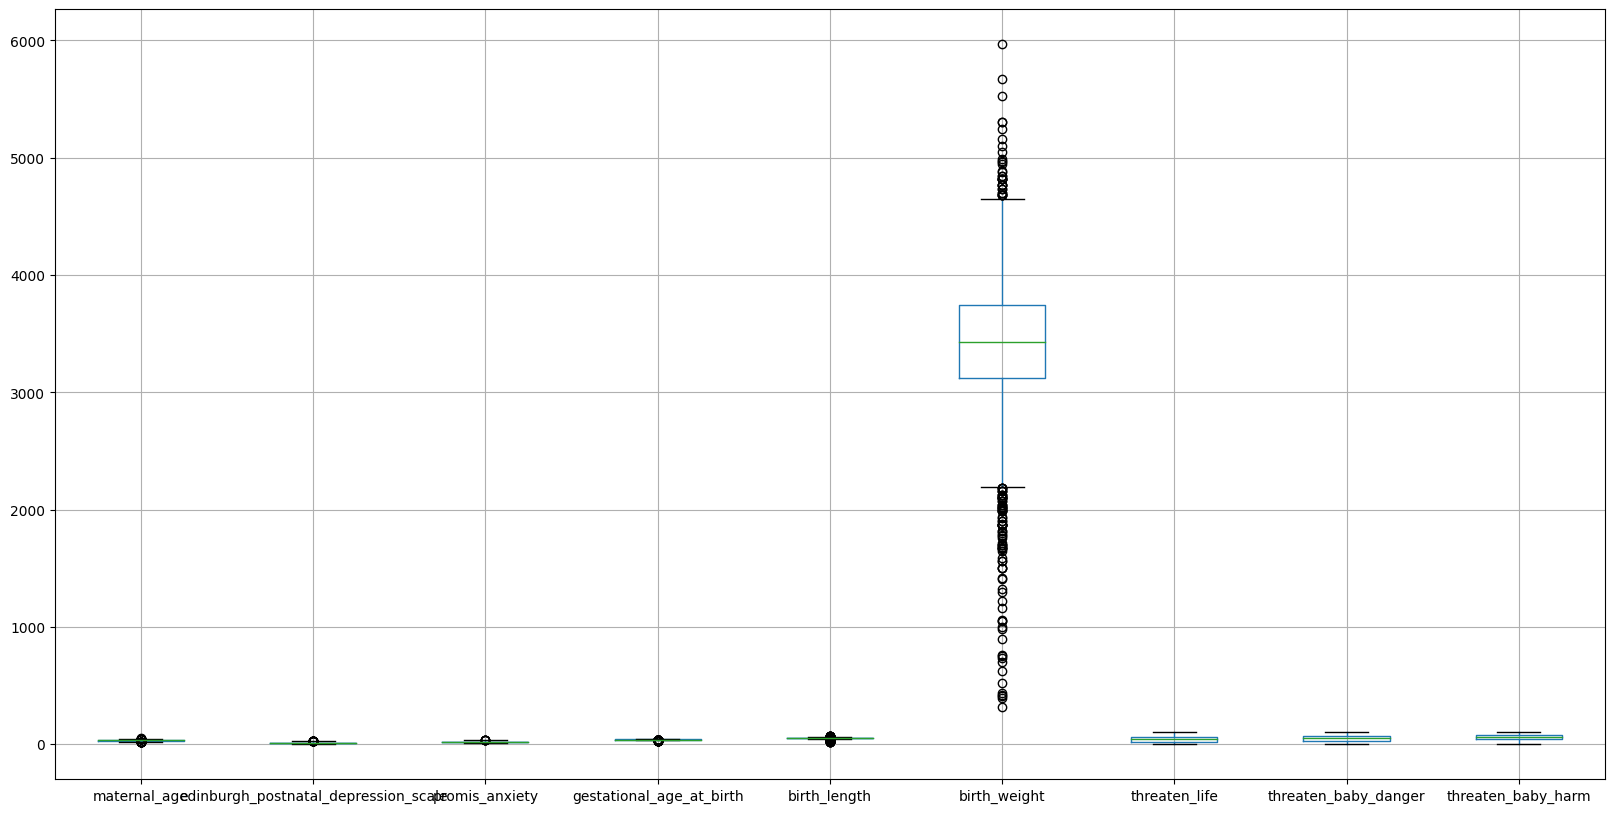

In [16]:
# mengecek jumlah outlier pada data
train.boxplot(figsize=(20,10))

In [17]:
# membuang outlier maternal_age
ma_q1 = train['maternal_age'].quantile(0.25)
ma_q3 = train['maternal_age'].quantile(0.75)
ma_iqr = ma_q3 - ma_q1
train = train[(train['maternal_age'] >= (ma_q1 - (1.5 * ma_iqr))) & (train['maternal_age'] <= (ma_q3 + (1.5 * ma_iqr)))]

# membuang outlier edinburgh_postnatal_depression_scale
epds_q1 = train['edinburgh_postnatal_depression_scale'].quantile(0.25)
epds_q3 = train['edinburgh_postnatal_depression_scale'].quantile(0.75)
epds_iqr = epds_q3 - epds_q1
train = train[(train['edinburgh_postnatal_depression_scale'] >= (epds_q1 - (1.5 * epds_iqr))) & (train['edinburgh_postnatal_depression_scale'] <= (epds_q3 + (1.5 * epds_iqr)))]

# membuang outlier promis_anxiety
pa_q1 = train['promis_anxiety'].quantile(0.25)
pa_q3 = train['promis_anxiety'].quantile(0.75)
pa_iqr = pa_q3 - pa_q1
train = train[(train['promis_anxiety'] >= (pa_q1 - (1.5 * pa_iqr))) & (train['promis_anxiety'] <= (pa_q3 + (1.5 * pa_iqr)))]

# membuang outlier gestational_age_at_birth
gaab_q1 = train['gestational_age_at_birth'].quantile(0.25)
gaab_q3 = train['gestational_age_at_birth'].quantile(0.75)
gaab_iqr = gaab_q3 - gaab_q1
train = train[(train['gestational_age_at_birth'] >= (gaab_q1 - (1.5 * gaab_iqr))) & (train['gestational_age_at_birth'] <= (gaab_q3 + (1.5 * gaab_iqr)))]

# membuang outlier birth_length
bl_q1 = train['birth_length'].quantile(0.25)
bl_q3 = train['birth_length'].quantile(0.75)
bl_iqr = bl_q3 - bl_q1
train = train[(train['birth_length'] >= (bl_q1 - (1.5 * bl_iqr))) & (train['birth_length'] <= (bl_q3 + (1.5 * bl_iqr)))]

# membuang outlier birth_weight
bw_q1 = train['birth_weight'].quantile(0.25)
bw_q3 = train['birth_weight'].quantile(0.75)
bw_iqr = bw_q3 - bw_q1
train = train[(train['birth_weight'] >= (bw_q1 - (1.5 * bw_iqr))) & (train['birth_weight'] <= (bw_q3 + (1.5 * bw_iqr)))]

### Training Preparation

In [18]:
# Mengecek unique values dalam tiap kolom kategorikal
unique_household_incomes = train['household_income'].unique()
unique_maternal_educations = train['maternal_education'].unique()
unique_delivery_dates = train['delivery_date'].unique()
unique_nicu_stays = train['nicu_stay'].unique()
unique_languages = train['language'].unique()
unique_delivery_modes = train['delivery_mode'].unique()
print(
    "\nHousehold incomes:\n", unique_household_incomes,
    "\nMaternal educations:\n", unique_maternal_educations,
    "\nDelivery dates:\n", unique_delivery_dates,
    "\nNICU stays:\n", unique_nicu_stays,
    "\nLanguages:\n", unique_languages,
    "\nDelivery modes:\n", unique_delivery_modes)


Household incomes:
 ['$125,000- $149,999' '$100,000 -$124,999' '$40,000-$69,999'
 '$70,000-$99,999' '$150,000 - $174,999' '$175,000- $199,999'
 '$20,000- $39,999' '$200,000+' 'Less than $20, 000'] 
Maternal educations:
 ['Masters degree' 'Undergraduate degree' 'College/trade school'
 'Doctoral Degree' 'High school diploma' 'Less than high school diploma'] 
Delivery dates:
 ['Oct2020' 'Jan2021' 'Jul2020' 'May2020' 'Nov2020' 'Jun2020' 'May2021'
 'Apr2021' 'Mar2021' 'Dec2020' 'Aug2020' 'Jun2021' 'Feb2021' 'Sep2020'
 'Oct2021' 'Sep2022' 'Aug2021' 'Nov2021' 'Sep2021' 'Jul2021' 'Jul2022'
 'May2022' 'Dec2021' 'Apr2020' 'Aug2022' 'Jun2022' 'Feb2022' 'Mar2022'
 'Jan2022'] 
NICU stays:
 ['No' 'Yes'] 
Languages:
 ['English' 'French'] 
Delivery modes:
 ['Vaginally' 'Caesarean-section (c-section)']


#### Encoding

In [19]:
# melakukan label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train['household_income'] = label_encoder.fit_transform(train['household_income'])
train['maternal_education'] = label_encoder.fit_transform(train['maternal_education'])
train['delivery_date'] = label_encoder.fit_transform(train['delivery_date'])

train.head()


,maternal_age,household_income,maternal_education,edinburgh_postnatal_depression_scale,promis_anxiety,gestational_age_at_birth,delivery_date,birth_length,birth_weight,nicu_stay,language,threaten_life,threaten_baby_danger,threaten_baby_harm,delivery_mode
0,31.8,1,4,6.0,11.0,39.29,24,47.00,3374.0,No,English,5,29,51,Vaginally
1,34.3,0,5,13.0,23.0,40.86,9,50.00,3005.0,No,English,66,83,86,Vaginally
2,29.3,0,4,12.0,23.0,40.86,11,55.00,4338.0,No,English,25,48,49,Vaginally
3,32.7,1,5,16.0,25.0,39.57,19,51.44,3232.0,No,English,71,73,59,Vaginally
4,29.6,1,0,19.0,28.0,37.71,22,51.00,3260.0,No,English,100,81,91,Caesarean-section (c-section)


In [20]:
# melakukan one hot encoding
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

train = pd.get_dummies(train, columns=['delivery_mode', 'language', 'nicu_stay'])

train.head()

,maternal_age,household_income,maternal_education,edinburgh_postnatal_depression_scale,promis_anxiety,gestational_age_at_birth,delivery_date,birth_length,birth_weight,threaten_life,threaten_baby_danger,threaten_baby_harm,delivery_mode_Caesarean-section (c-section),delivery_mode_Vaginally,language_English,language_French,nicu_stay_No,nicu_stay_Yes
0,31.8,1,4,6.0,11.0,39.29,24,47.00,3374.0,5,29,51,False,True,True,False,True,False
1,34.3,0,5,13.0,23.0,40.86,9,50.00,3005.0,66,83,86,False,True,True,False,True,False
2,29.3,0,4,12.0,23.0,40.86,11,55.00,4338.0,25,48,49,False,True,True,False,True,False
3,32.7,1,5,16.0,25.0,39.57,19,51.44,3232.0,71,73,59,False,True,True,False,True,False
4,29.6,1,0,19.0,28.0,37.71,22,51.00,3260.0,100,81,91,True,False,True,False,True,False


## [Jawaban] Eksplorasi



### Eksplorasi Pertanyaan 1

Pertanyaan 1: Bagaimana hubungan antara panjang dan berat kelahiran dengan tingkat kecemasan?

### Eksplorasi Pertanyaan 2

Pertanyaan 2: Apa bulan-tahun yang memiliki kombinasi tertinggi antara tingkat depresi dan kecemasan?

### Eksplorasi Pertanyaan 3

Pertanyaan 3: Bagaimana persebaran ‘threaten_life’, ‘threaten_baby_danger’, dan ‘threaten_baby_harm’ untuk setiap tingkat pendidikan?

In [21]:
#mengecek nilai unik pada tingkat pendidikan
unique_maternal_educations = train_with_outlier['maternal_education'].unique()
unique_maternal_educations

array(['Masters degree', 'Undergraduate degree', 'College/trade school',
       'Doctoral Degree', 'High school diploma',
       'Less than high school diploma'], dtype=object)

Akan digunakan kde plot untuk setiap tingkat pendidikan untuk membandingkan persebaran ‘threaten_life’, ‘threaten_baby_danger’, dan ‘threaten_baby_harm’

- Masters Degree

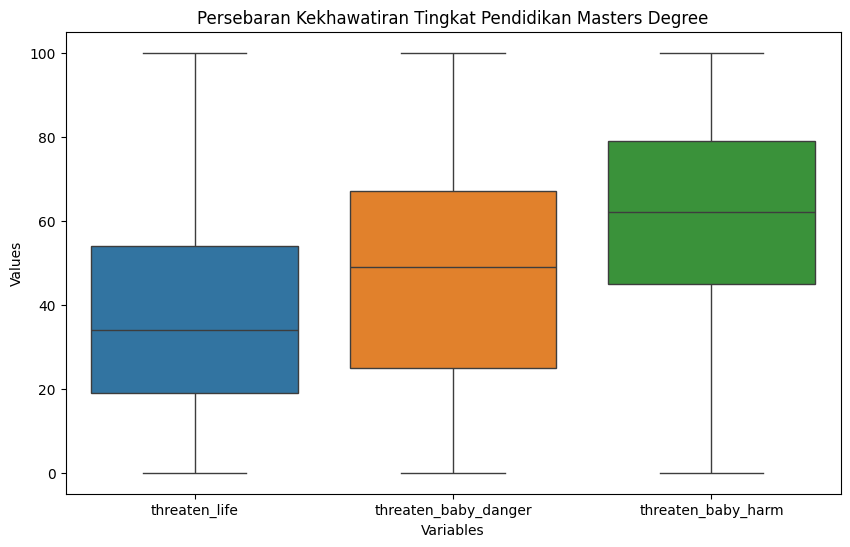

In [22]:
# Memisahkan data
tl_master = train_with_outlier[train_with_outlier['maternal_education'] == "Masters degree"]['threaten_life']
tbd_master = train_with_outlier[train_with_outlier['maternal_education'] == "Masters degree"]['threaten_baby_danger']
tbh_master = train_with_outlier[train_with_outlier['maternal_education'] == "Masters degree"]['threaten_baby_harm']

# Membuat grafik box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=[tl_master, tbd_master, tbh_master])
plt.title('Persebaran Kekhawatiran Tingkat Pendidikan Masters Degree')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks([0, 1, 2], ['threaten_life', 'threaten_baby_danger', 'threaten_baby_harm'])  # Mengatur label sumbu x
plt.show()


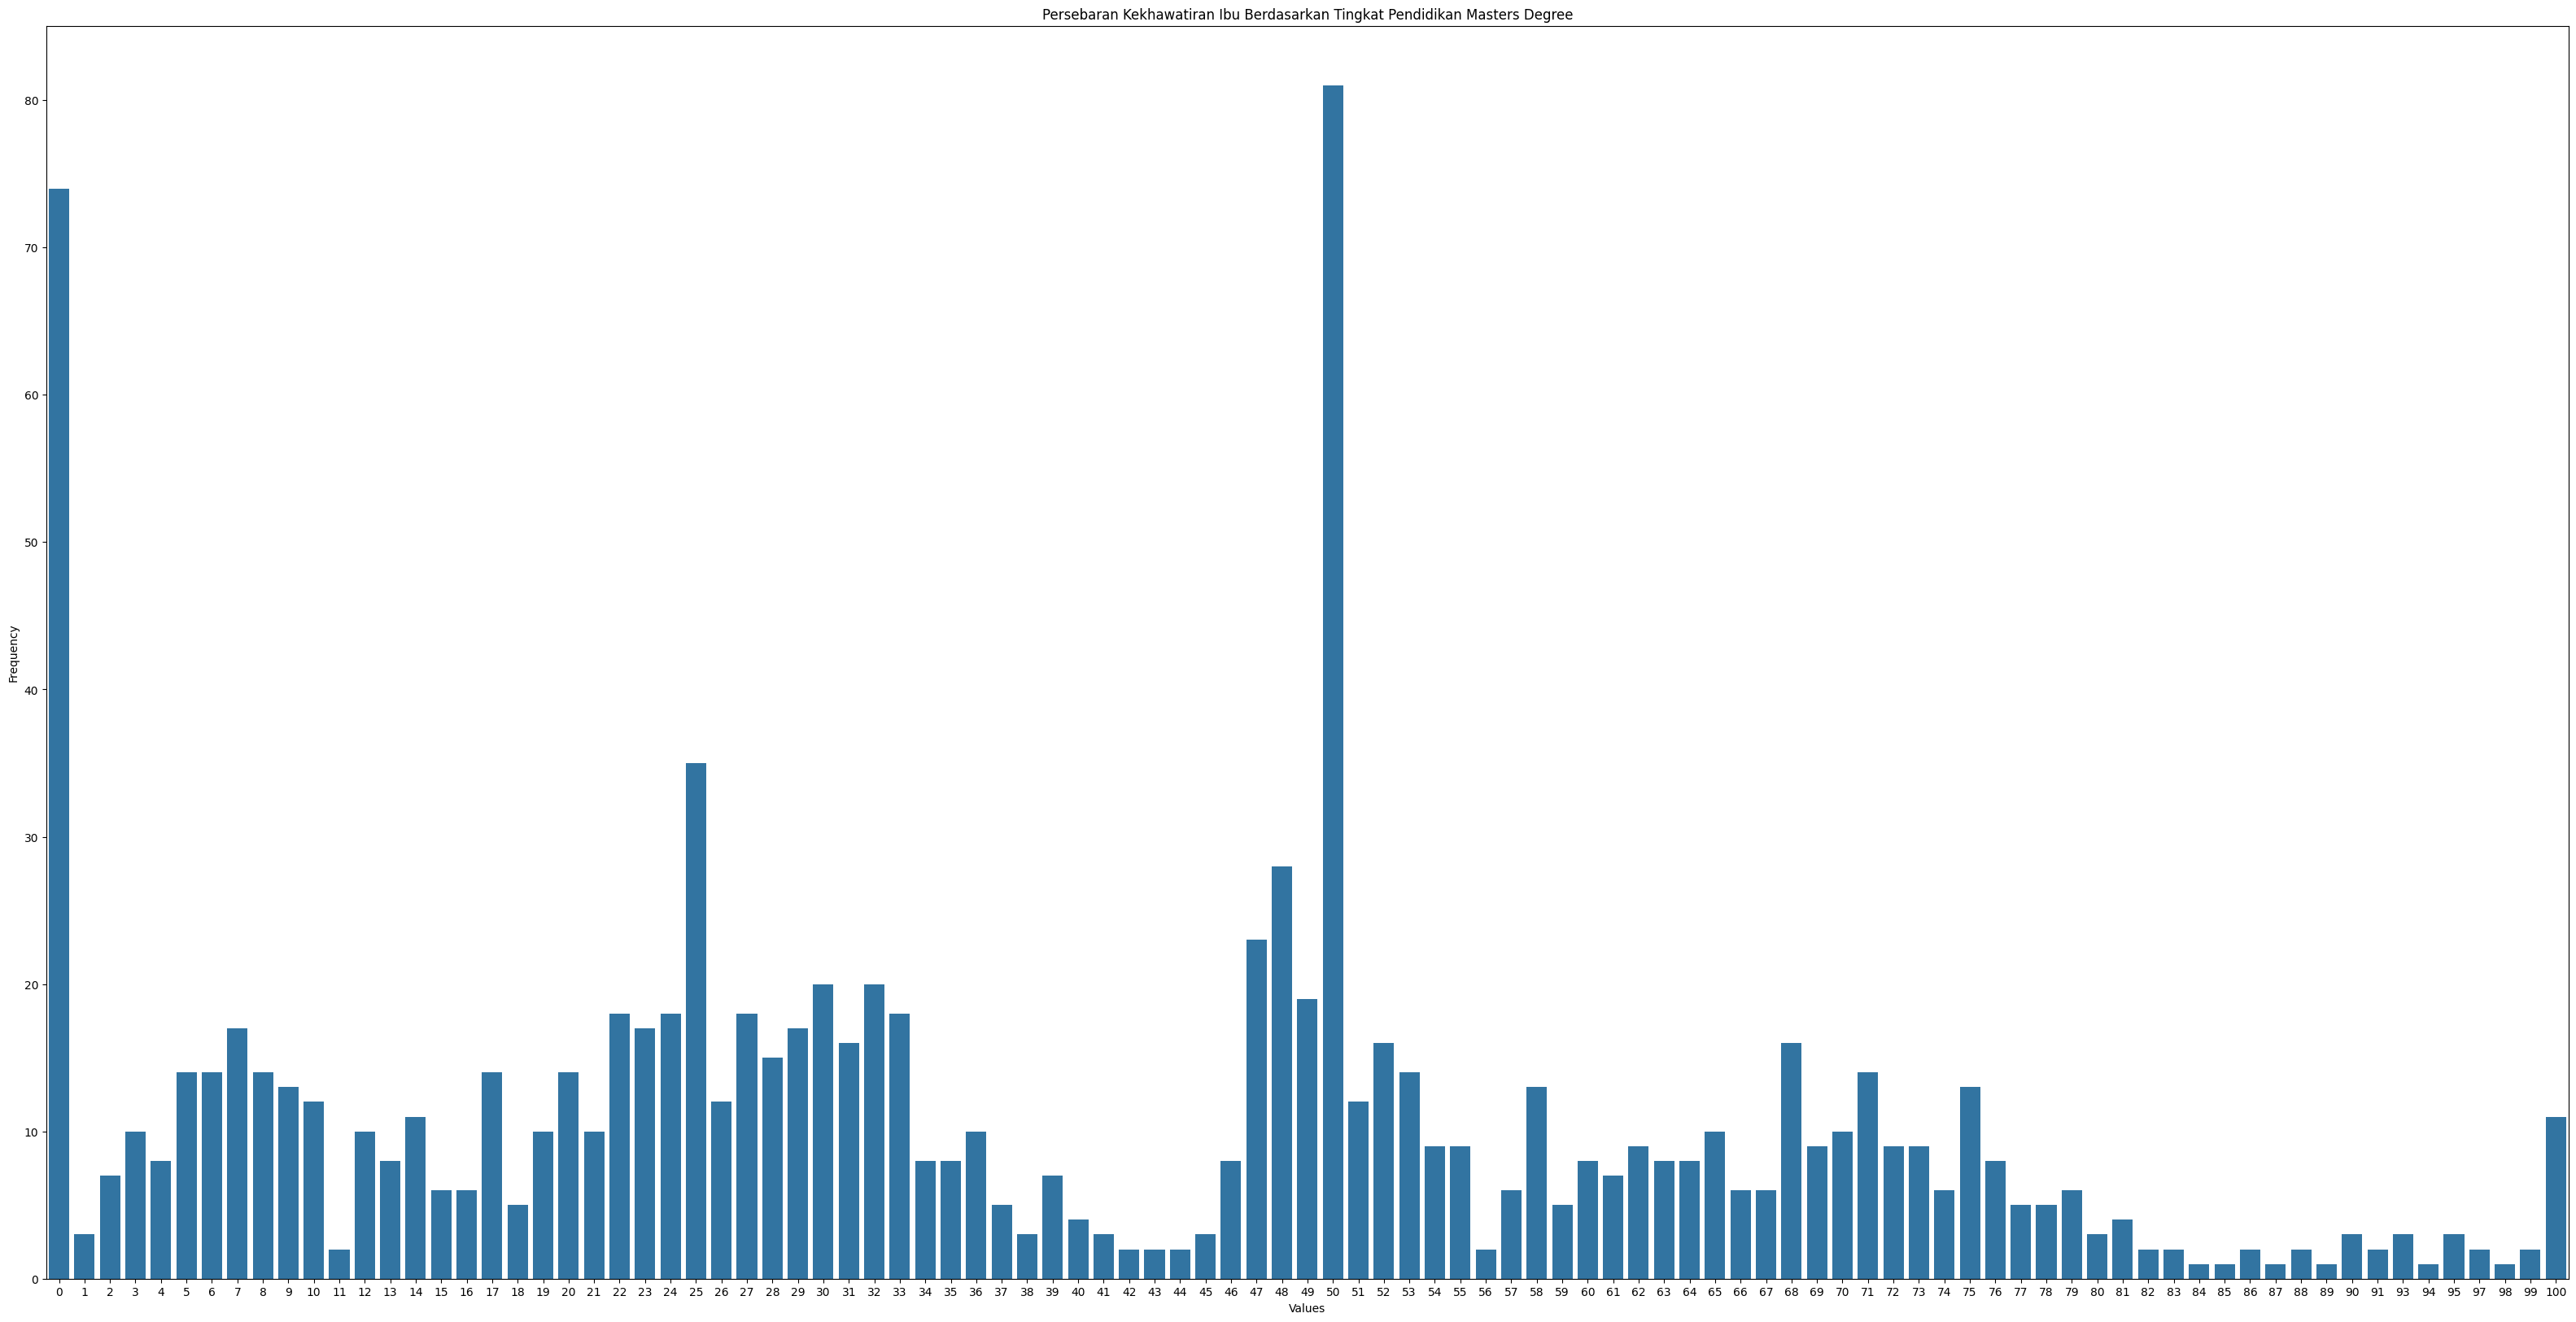

In [23]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tl_master)
plt.title('Persebaran Kekhawatiran Ibu Berdasarkan Tingkat Pendidikan Masters Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

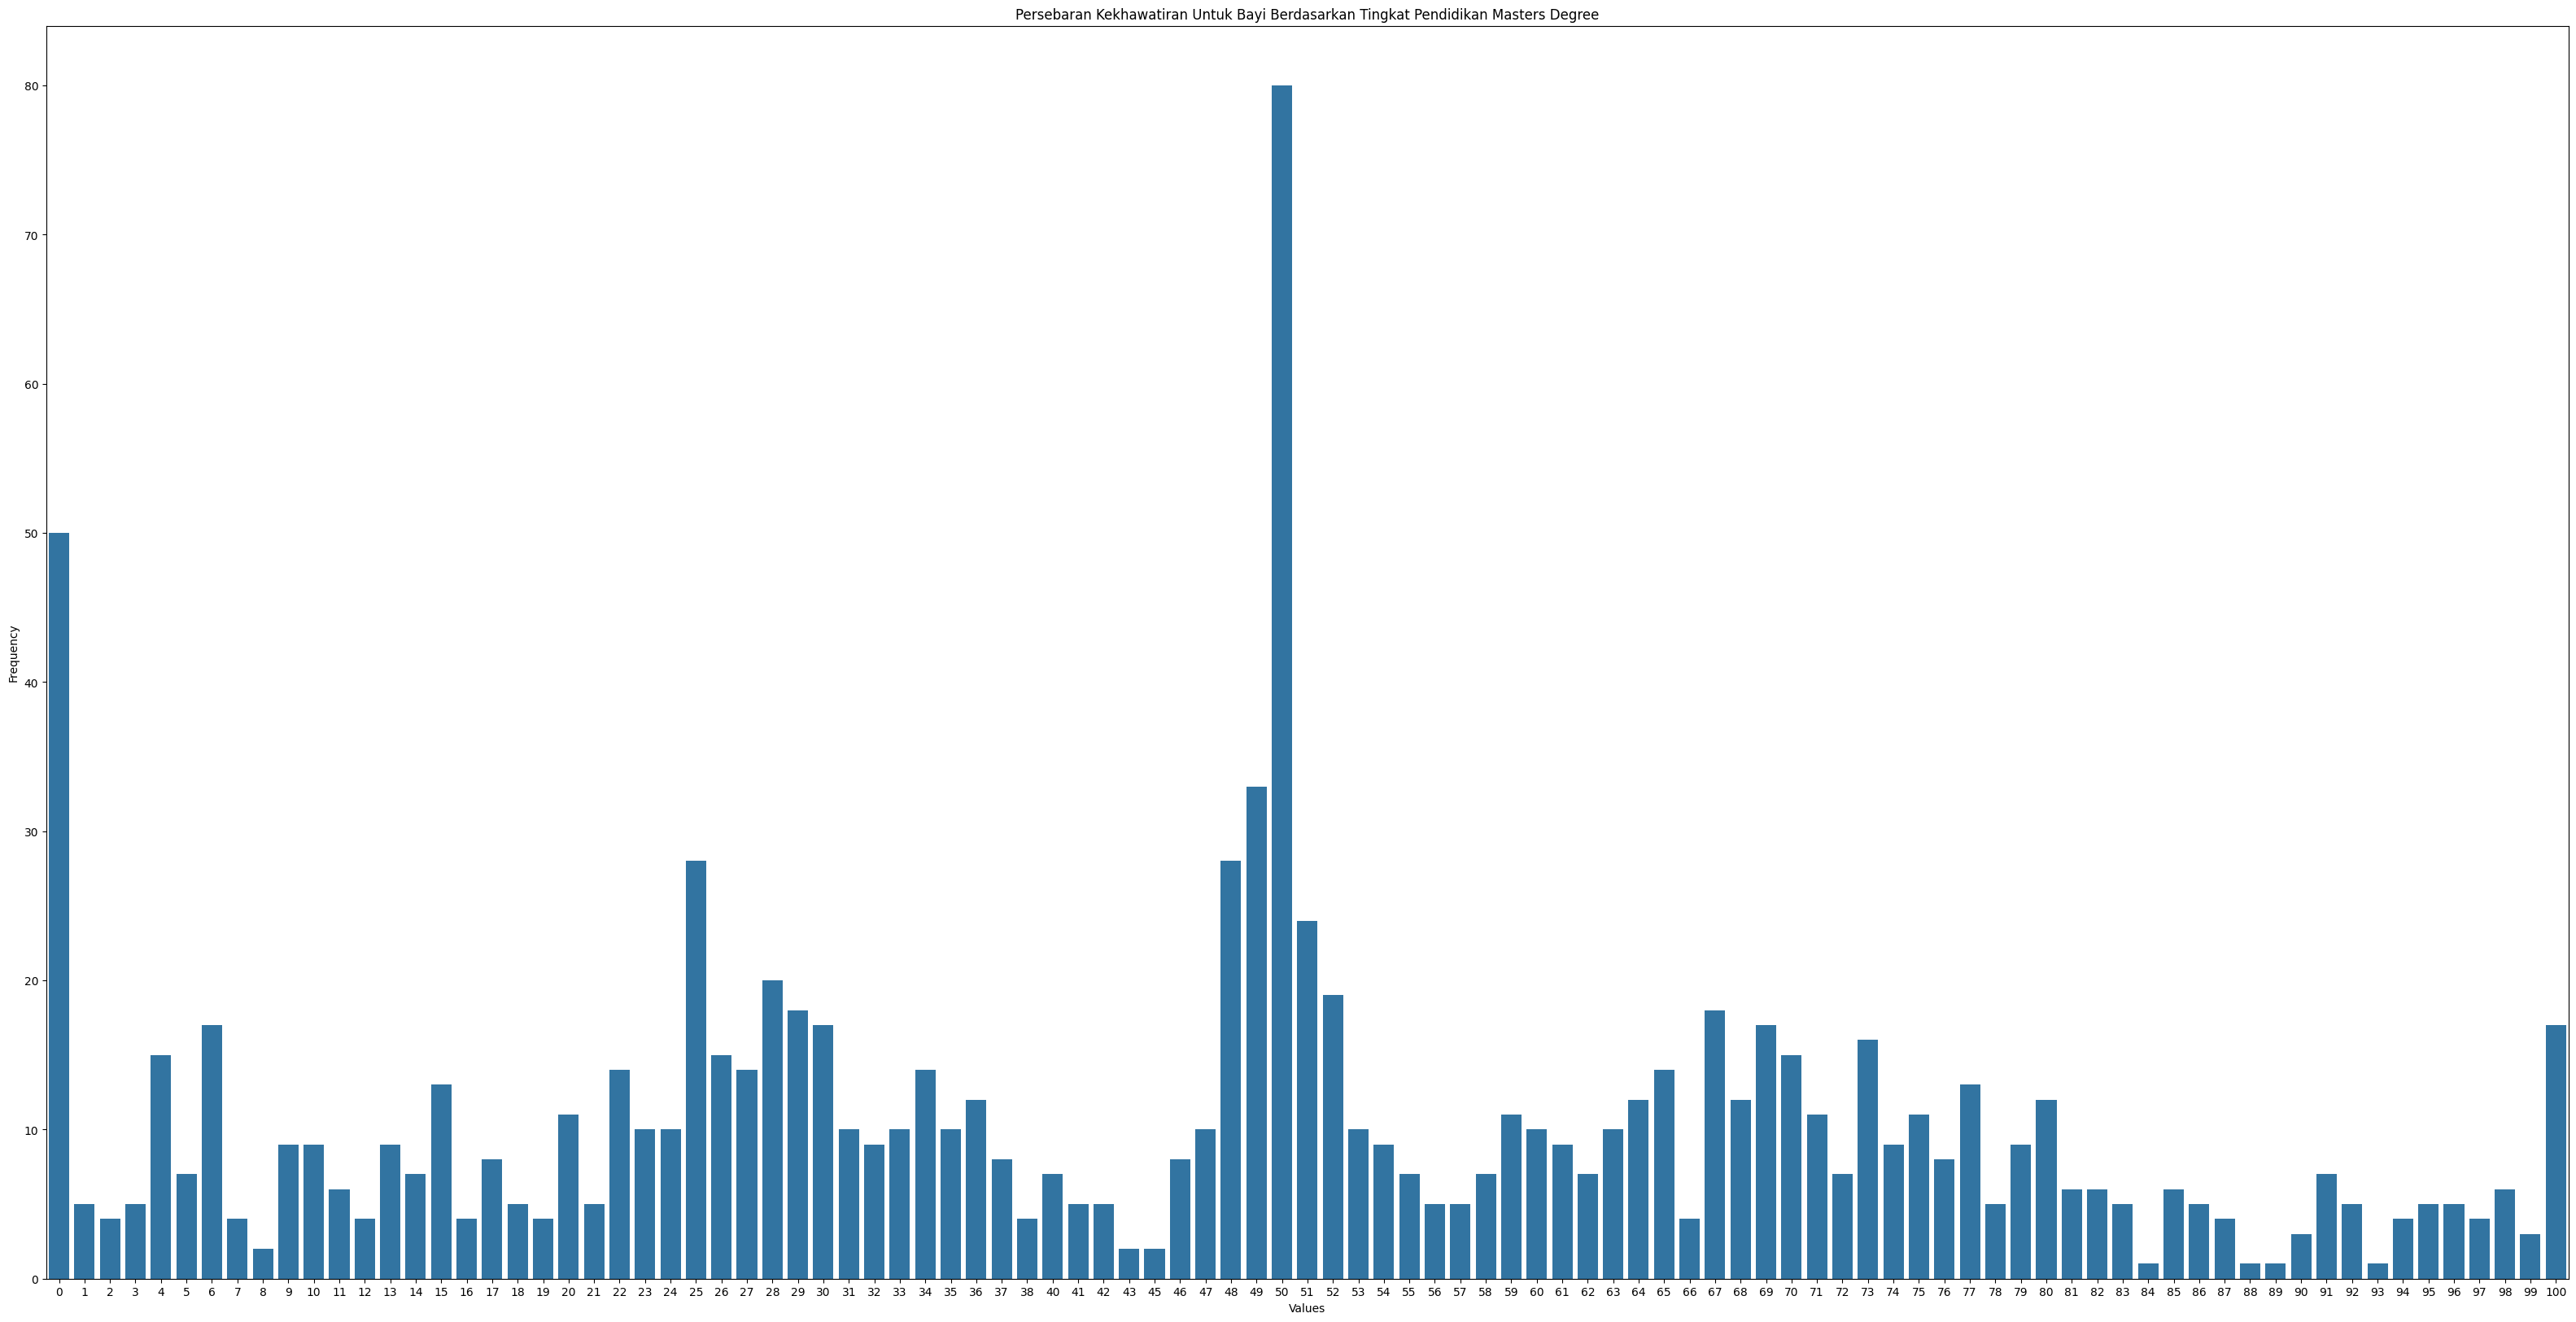

In [24]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbd_master)
plt.title('Persebaran Kekhawatiran Untuk Bayi Berdasarkan Tingkat Pendidikan Masters Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

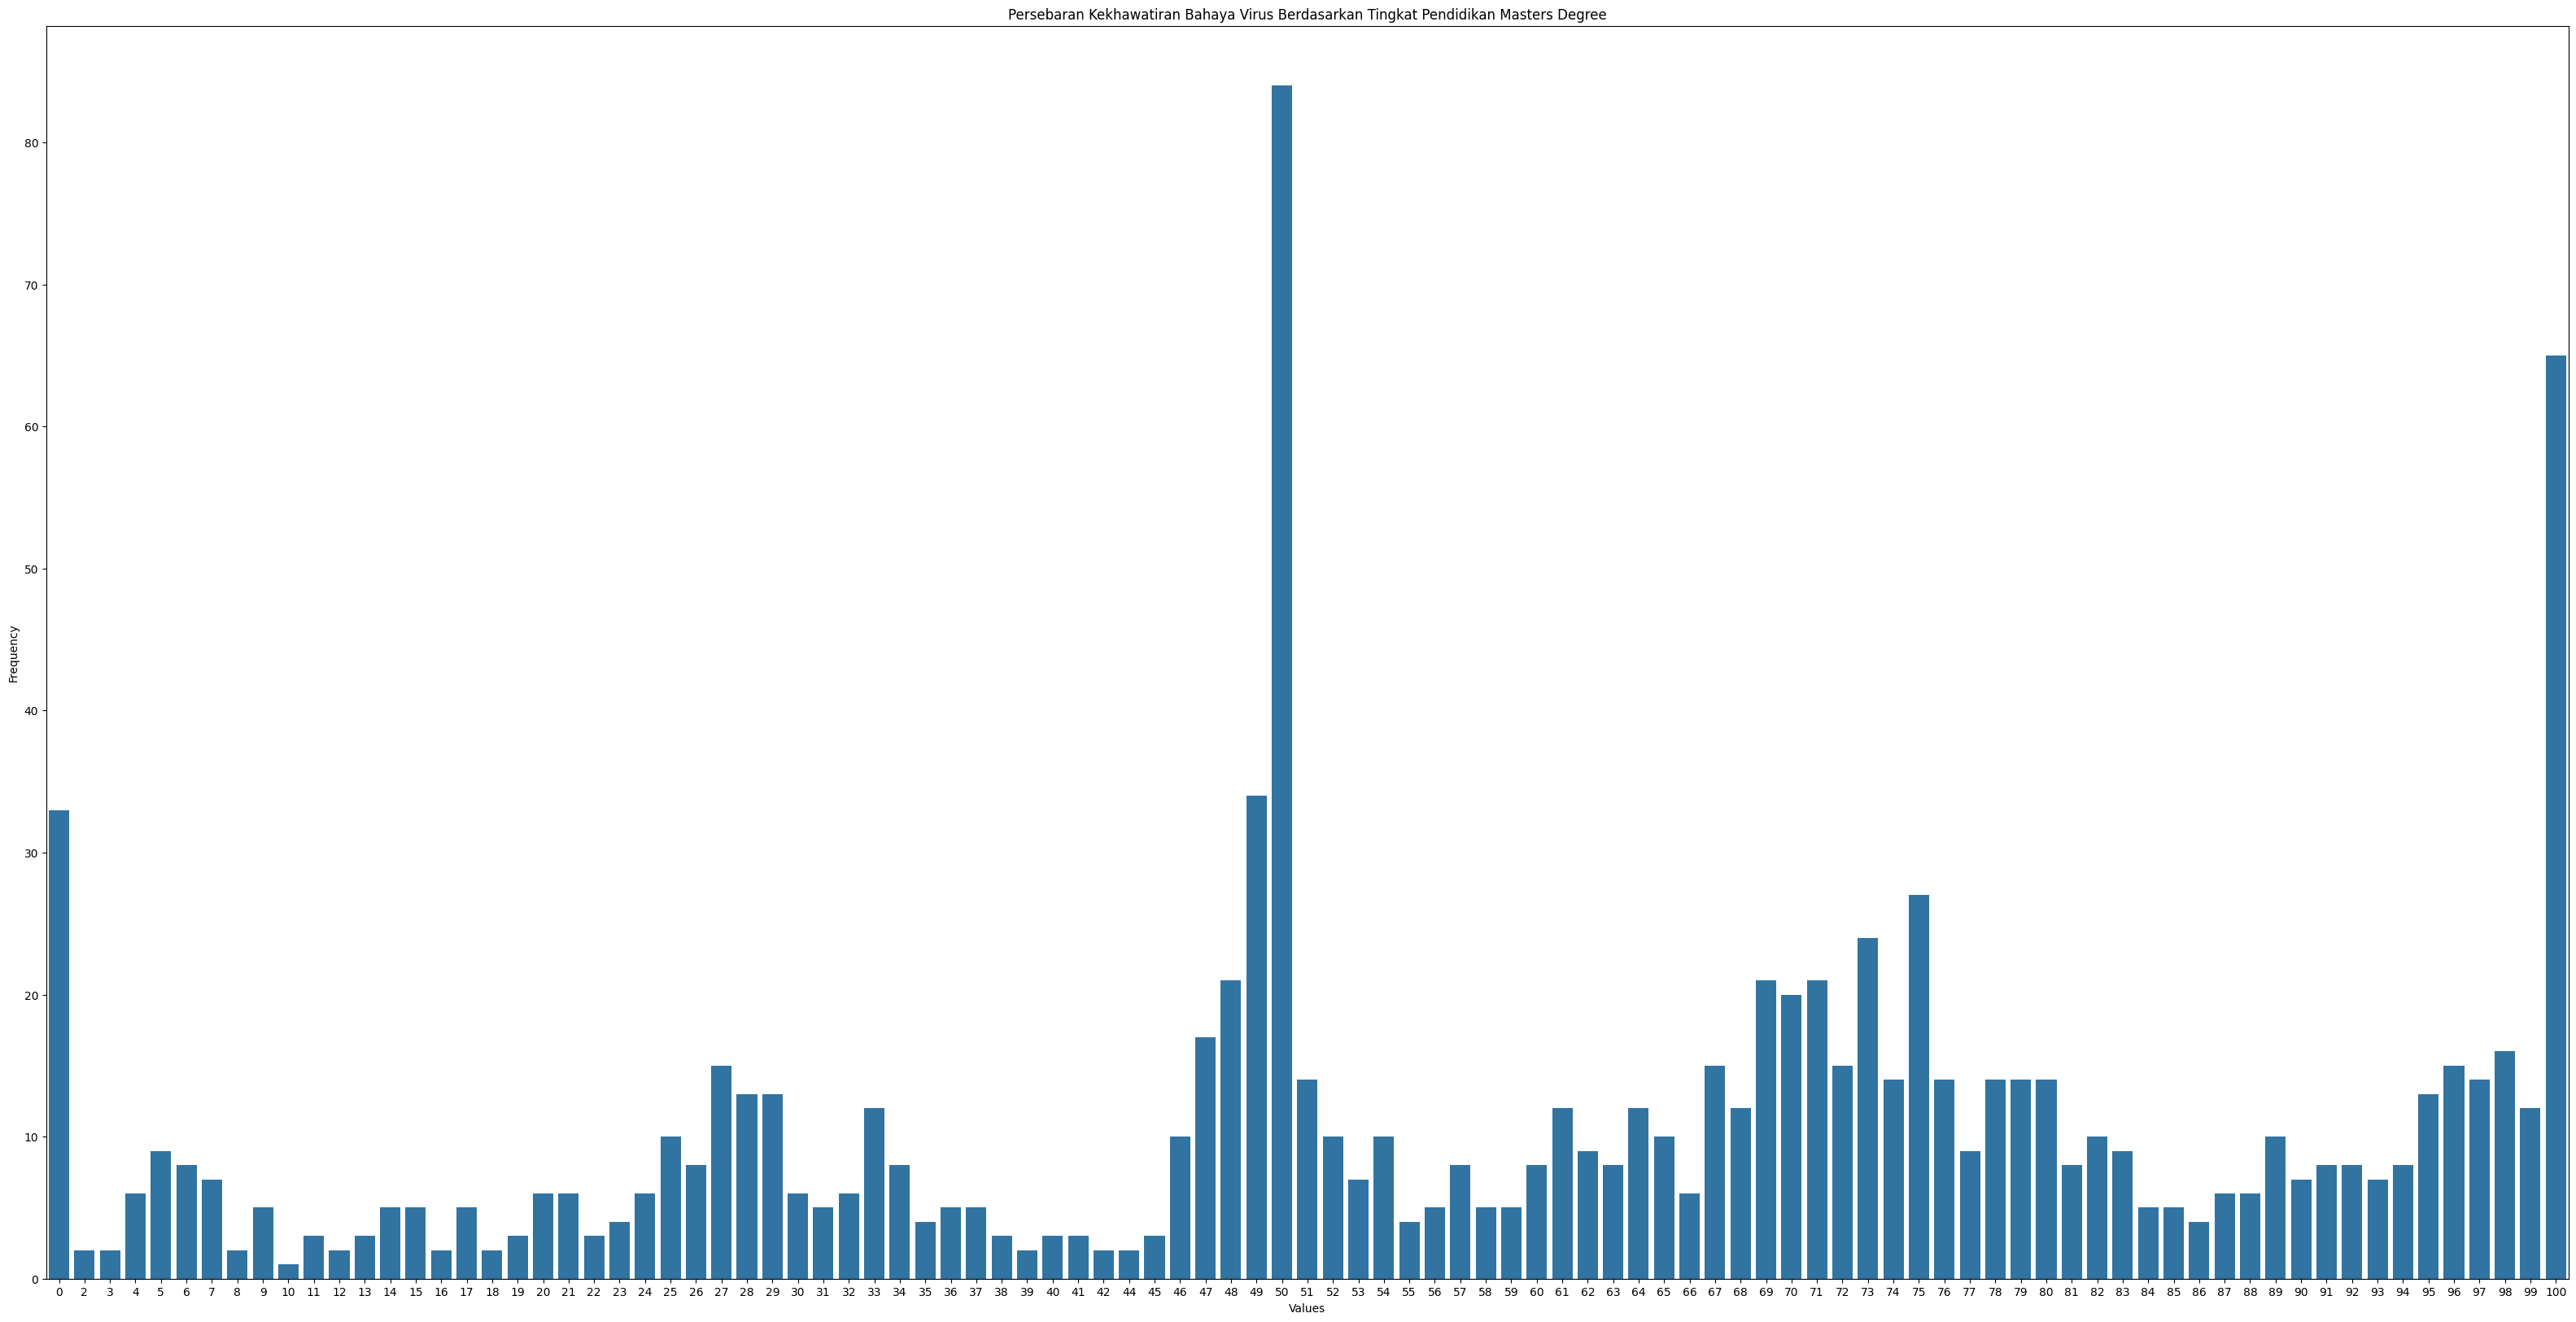

In [25]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbh_master)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan Masters Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

- Undergraduate Degree




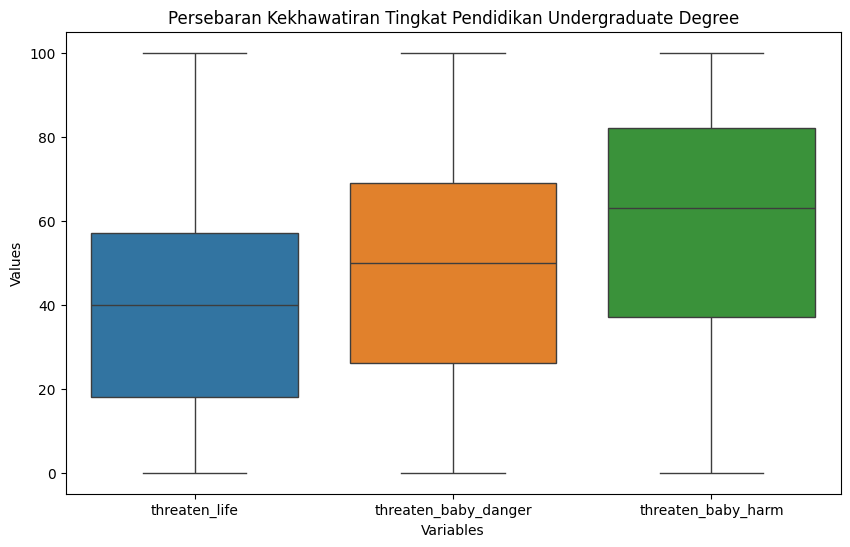

In [26]:
# Memisahkan data
tl_under = train_with_outlier[train_with_outlier['maternal_education'] == "Undergraduate degree"]['threaten_life']
tbd_under = train_with_outlier[train_with_outlier['maternal_education'] == "Undergraduate degree"]['threaten_baby_danger']
tbh_under = train_with_outlier[train_with_outlier['maternal_education'] == "Undergraduate degree"]['threaten_baby_harm']

# Membuat grafik box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=[tl_under, tbd_under, tbh_under])
plt.title('Persebaran Kekhawatiran Tingkat Pendidikan Undergraduate Degree')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks([0, 1, 2], ['threaten_life', 'threaten_baby_danger', 'threaten_baby_harm'])  # Mengatur label sumbu x
plt.show()

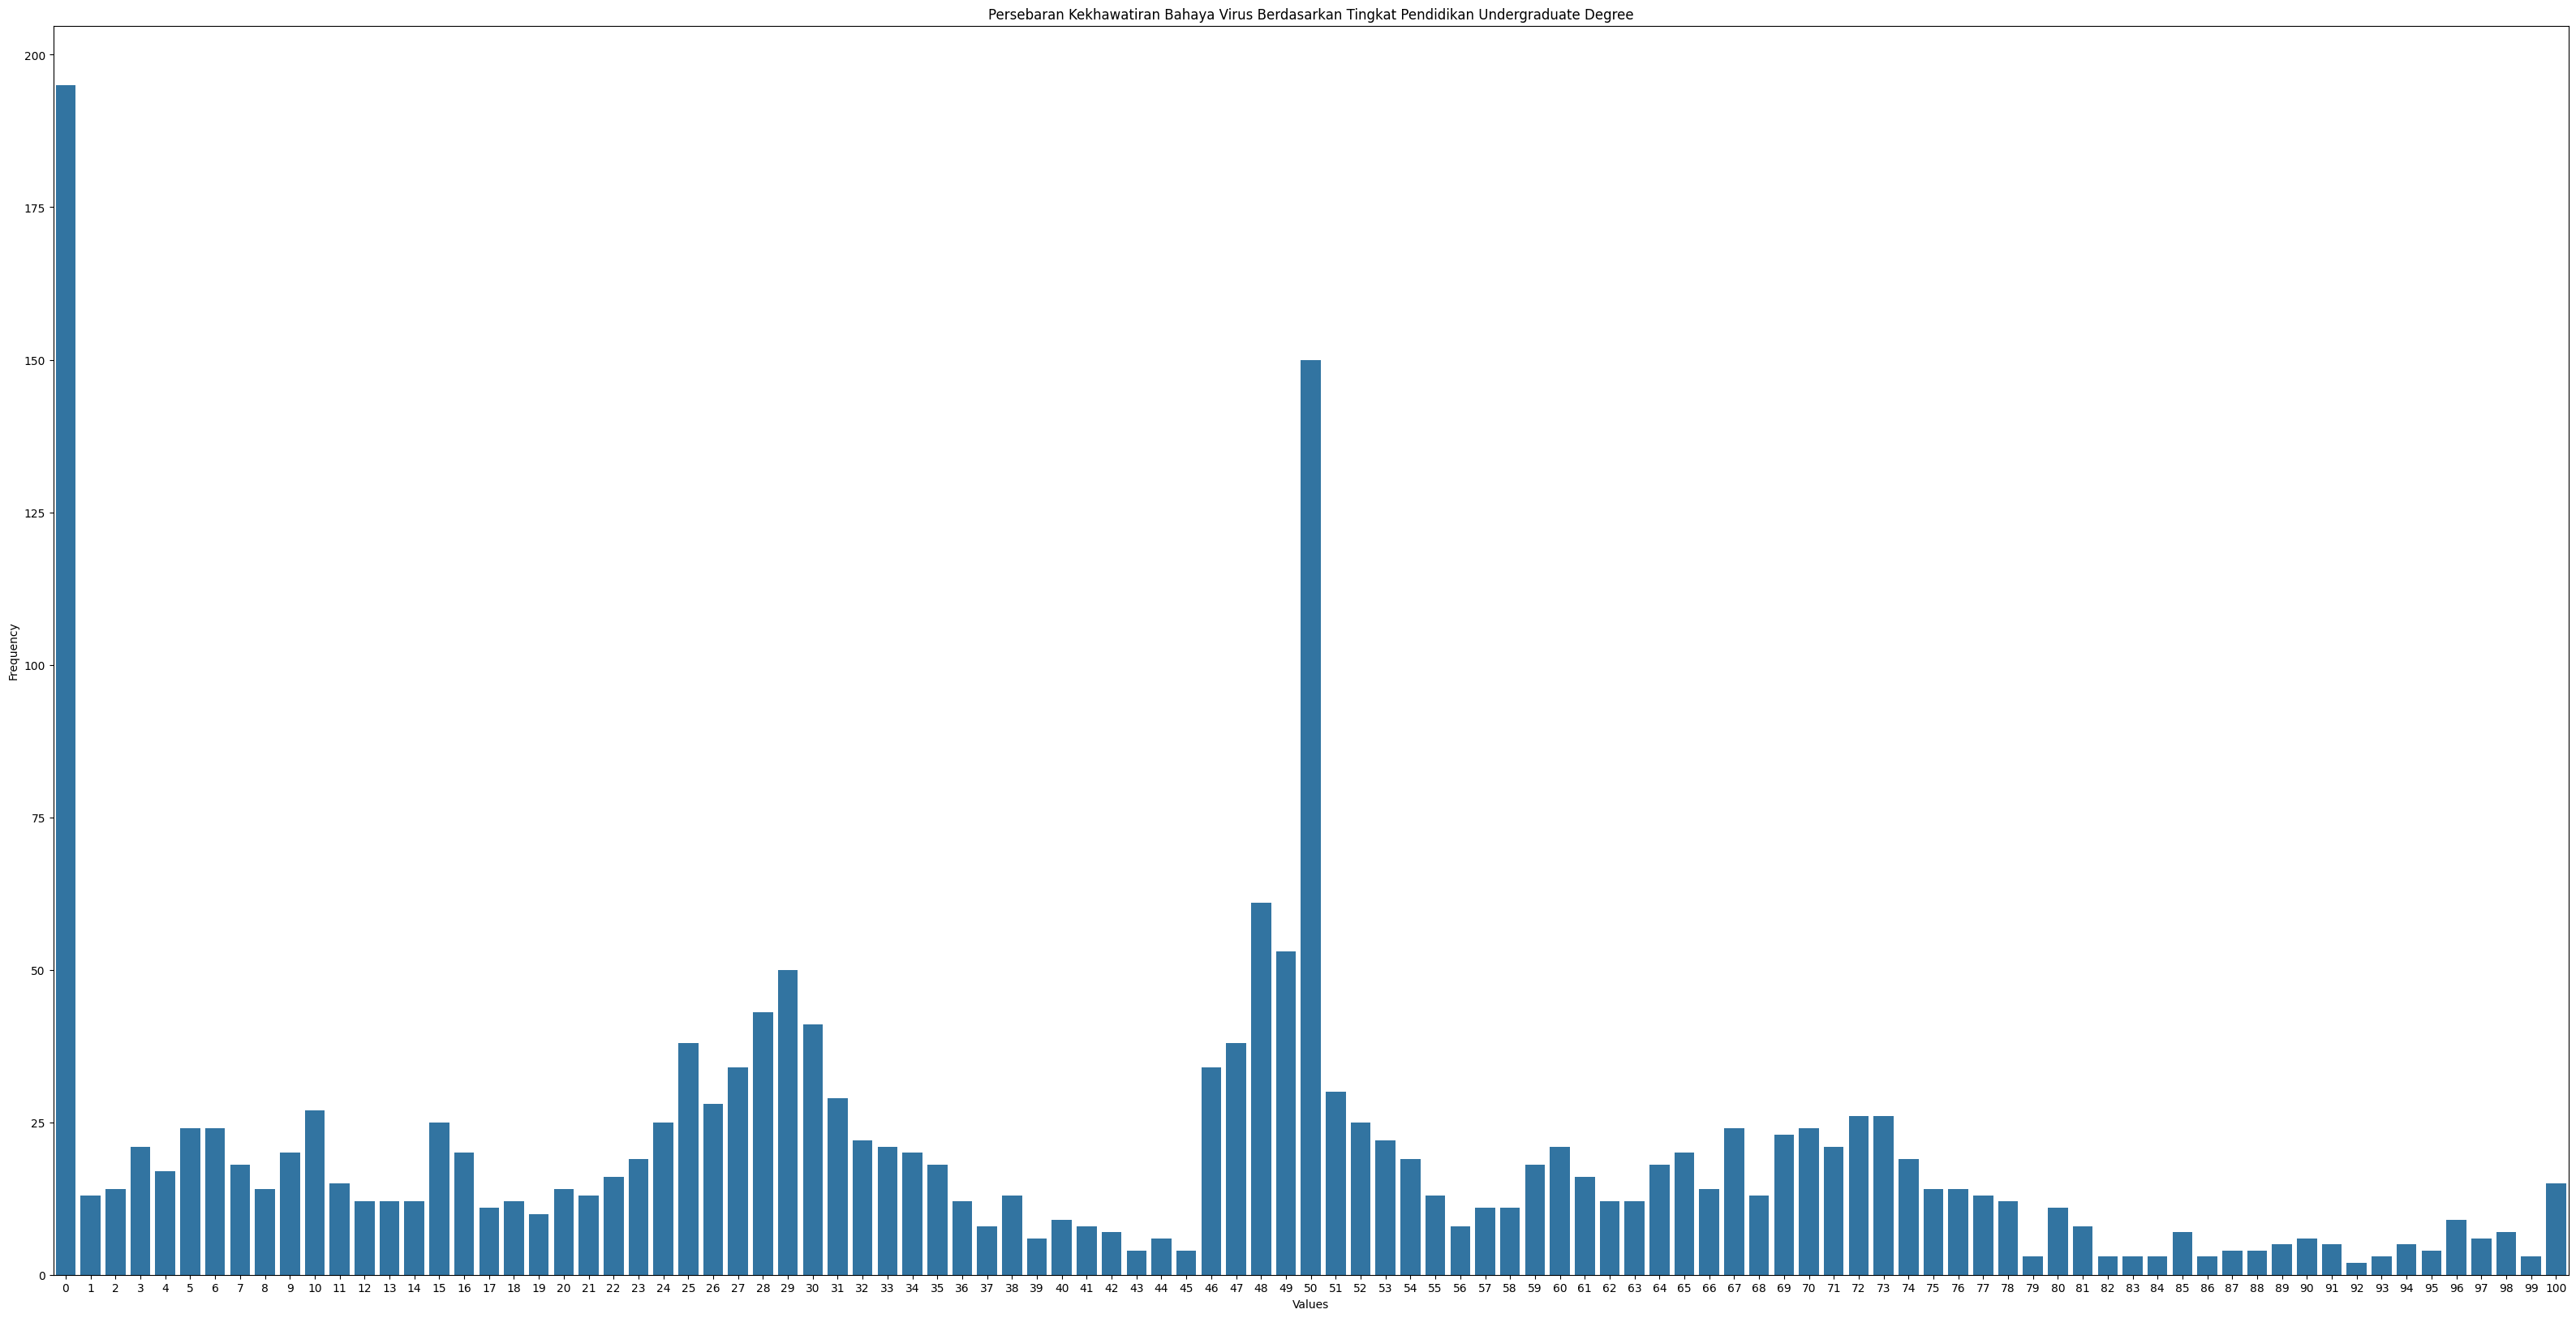

In [27]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tl_under)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan Undergraduate Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

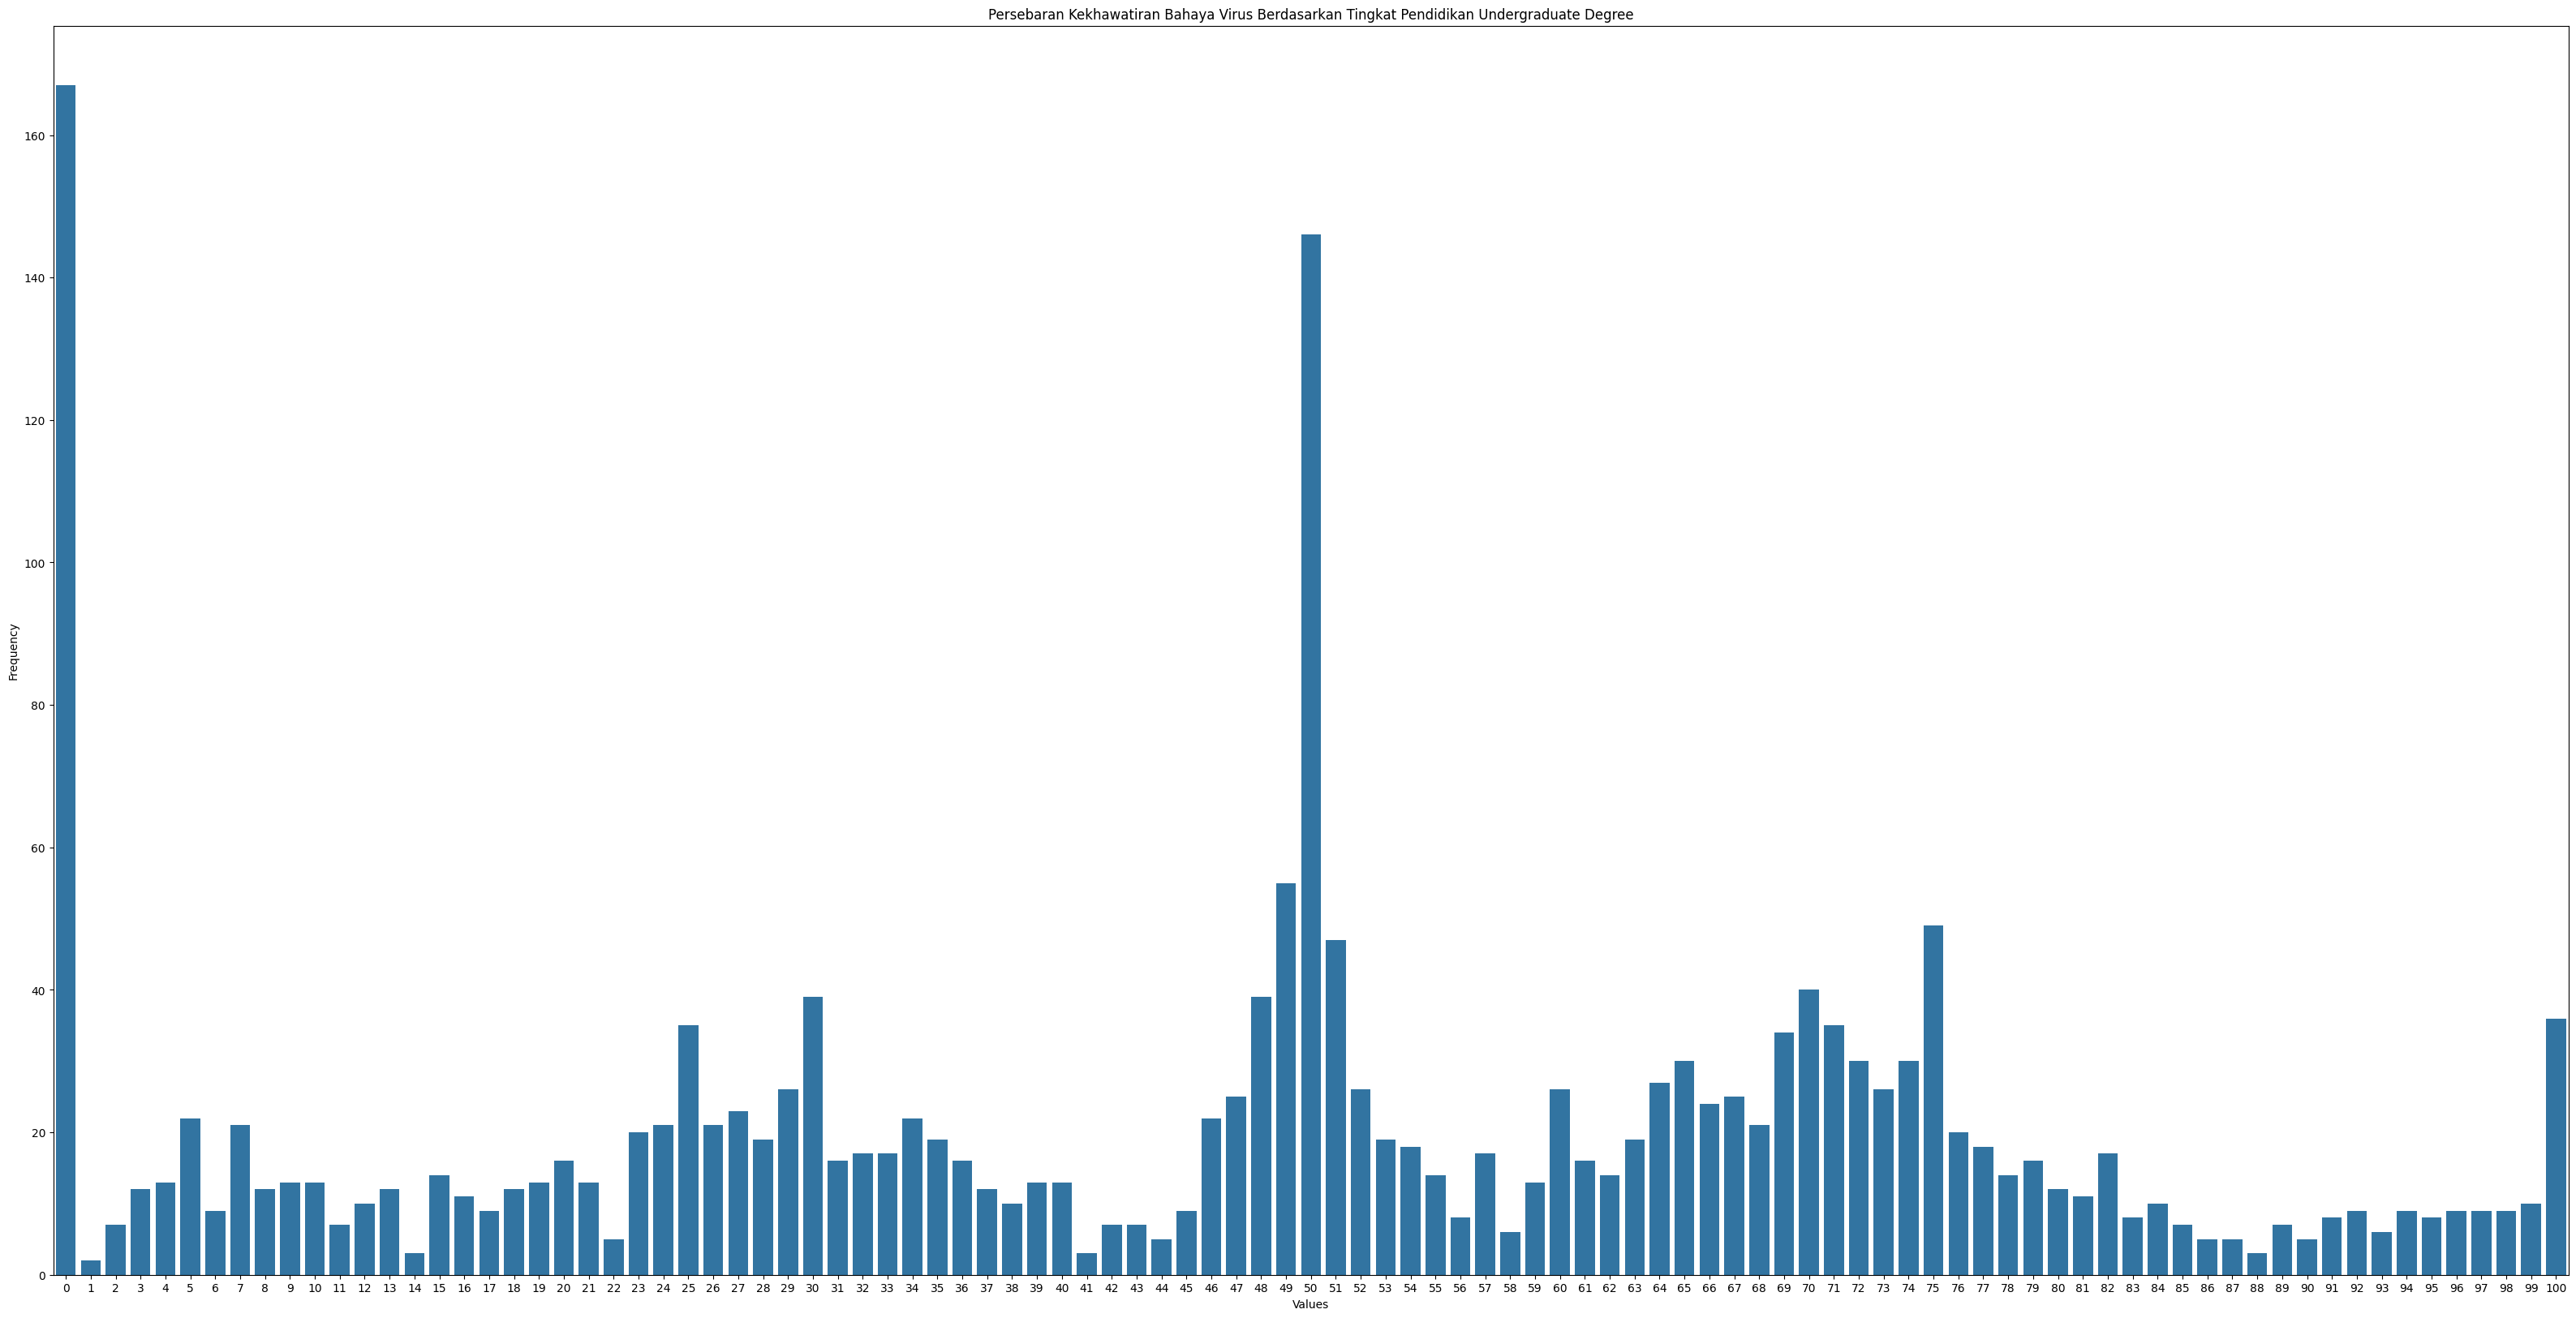

In [28]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbd_under)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan Undergraduate Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

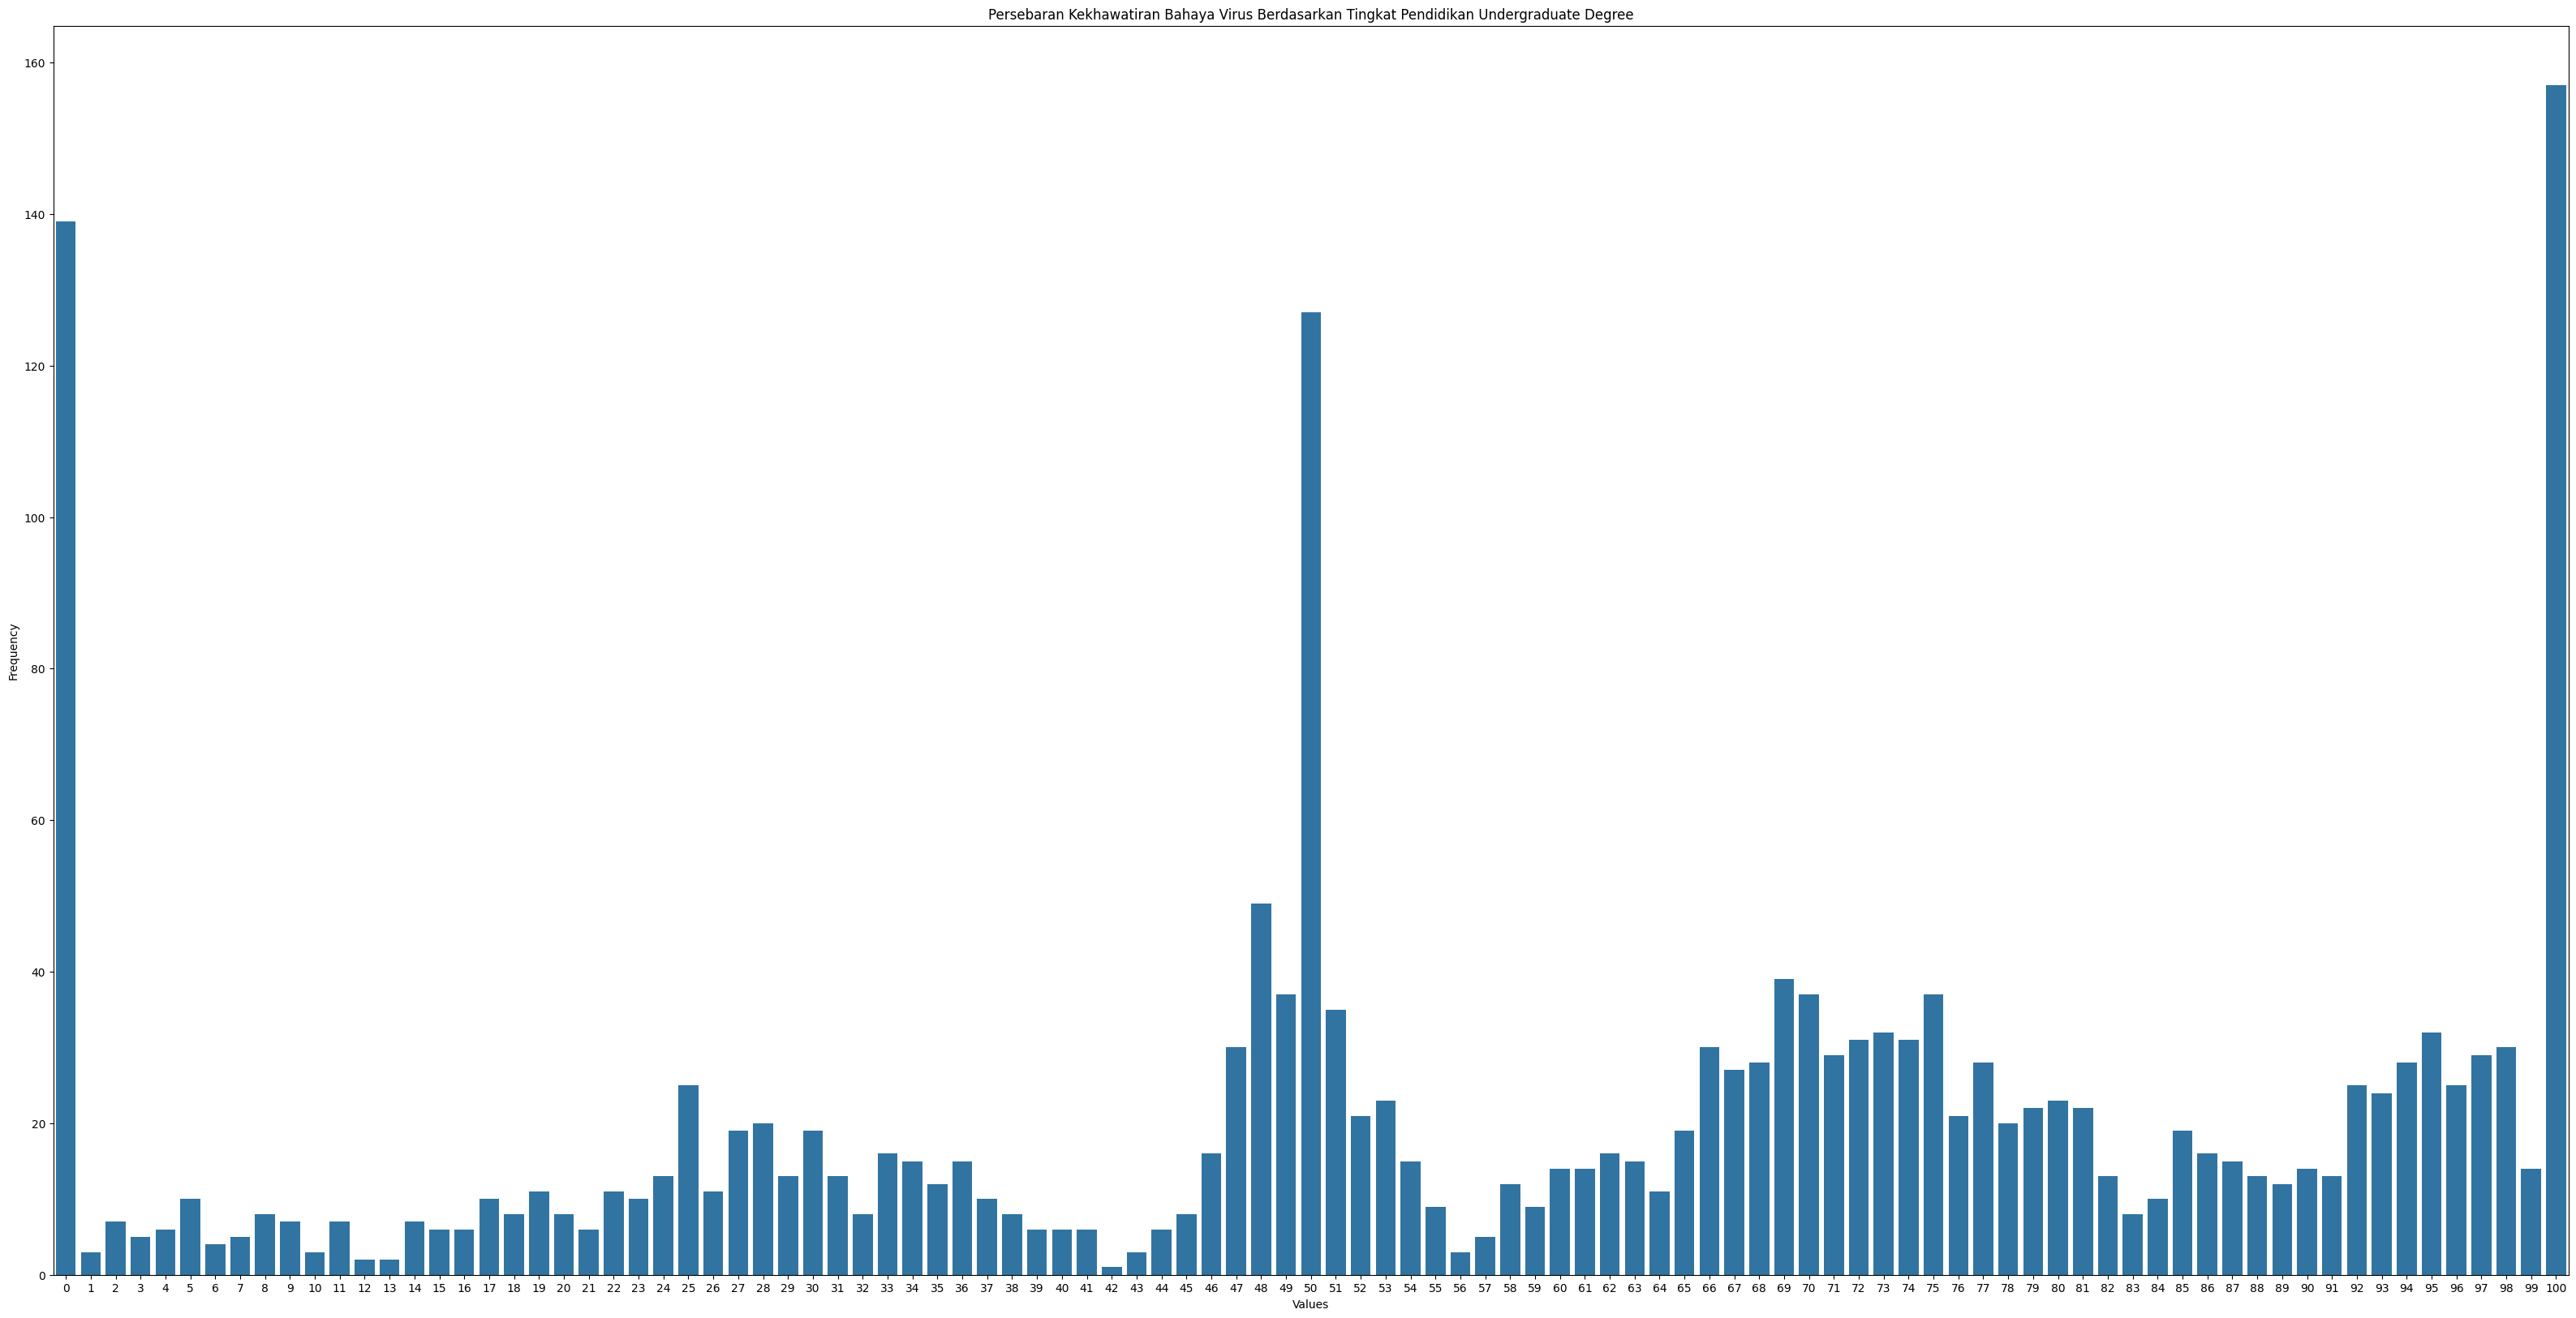

In [29]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbh_under)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan Undergraduate Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

- College/trade school

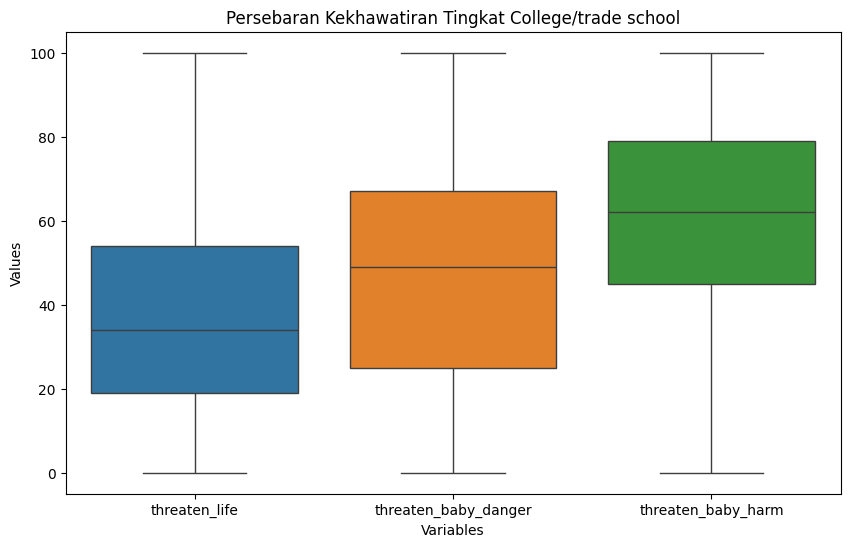

In [30]:
# Memisahkan data
tl_college = train_with_outlier[train_with_outlier['maternal_education'] == "College/trade school"]['threaten_life']
tbd_college = train_with_outlier[train_with_outlier['maternal_education'] == "College/trade school"]['threaten_baby_danger']
tbh_college = train_with_outlier[train_with_outlier['maternal_education'] == "College/trade school"]['threaten_baby_harm']

# Membuat grafik box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=[tl_master, tbd_master, tbh_master])
plt.title('Persebaran Kekhawatiran Tingkat College/trade school')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks([0, 1, 2], ['threaten_life', 'threaten_baby_danger', 'threaten_baby_harm'])  # Mengatur label sumbu x
plt.show()


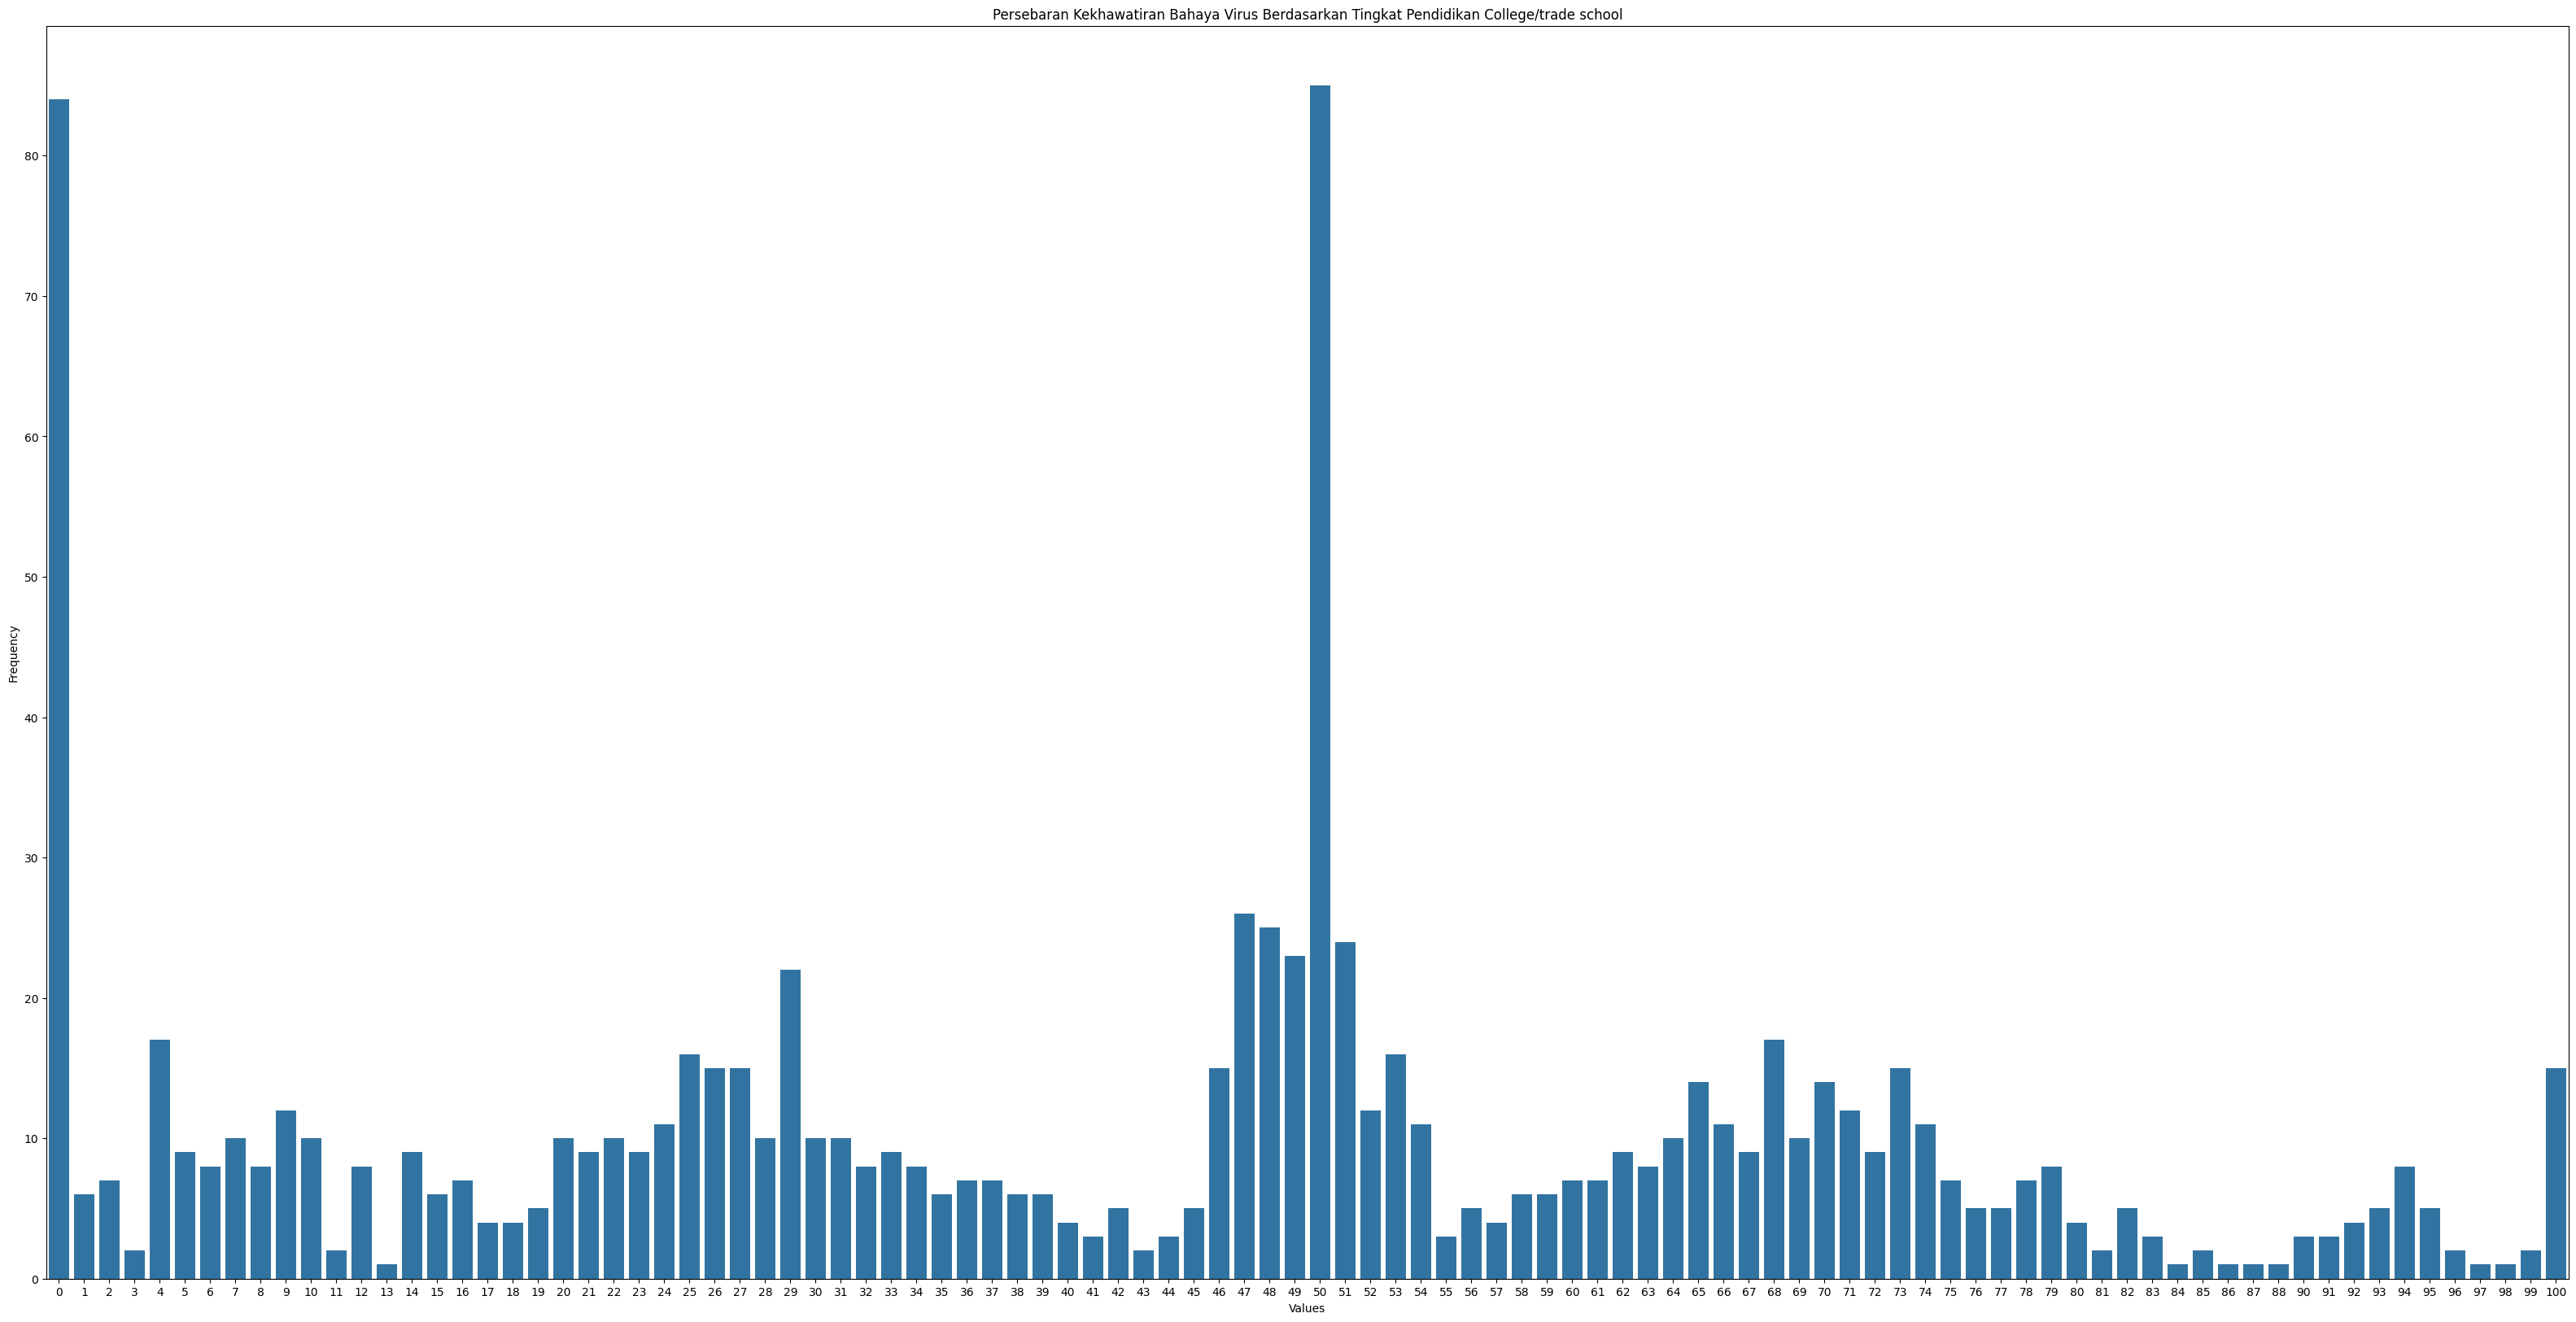

In [31]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tl_college)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan College/trade school')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

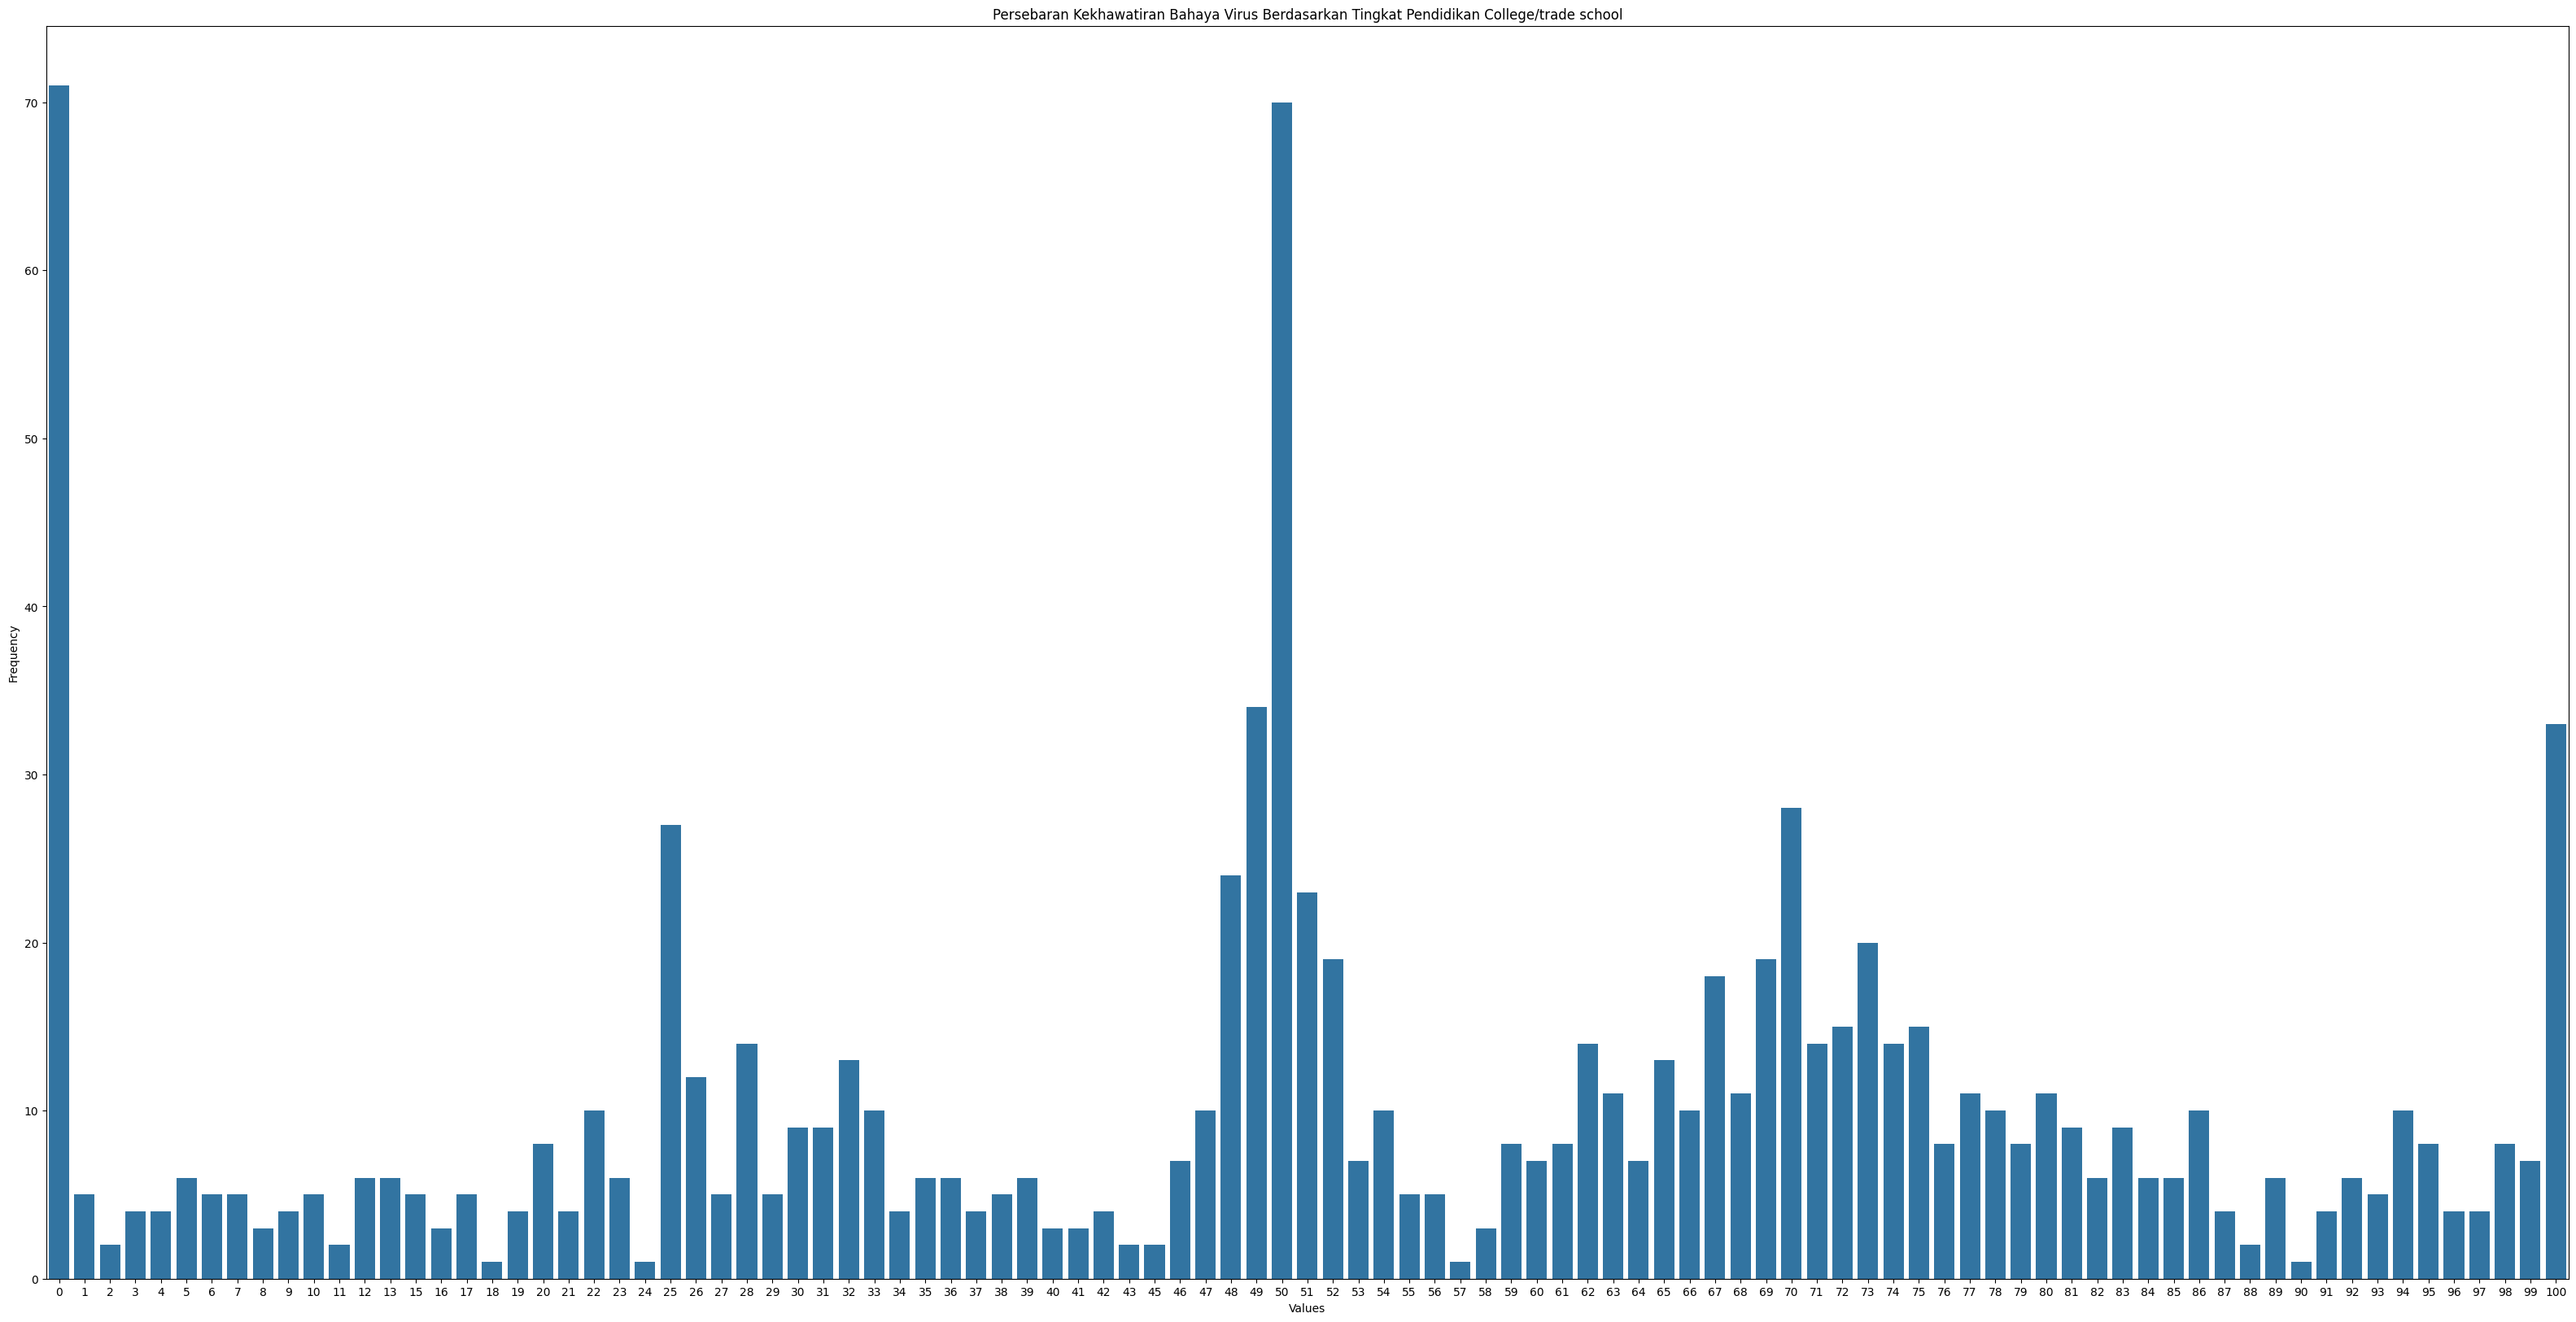

In [32]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbd_college)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan College/trade school')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

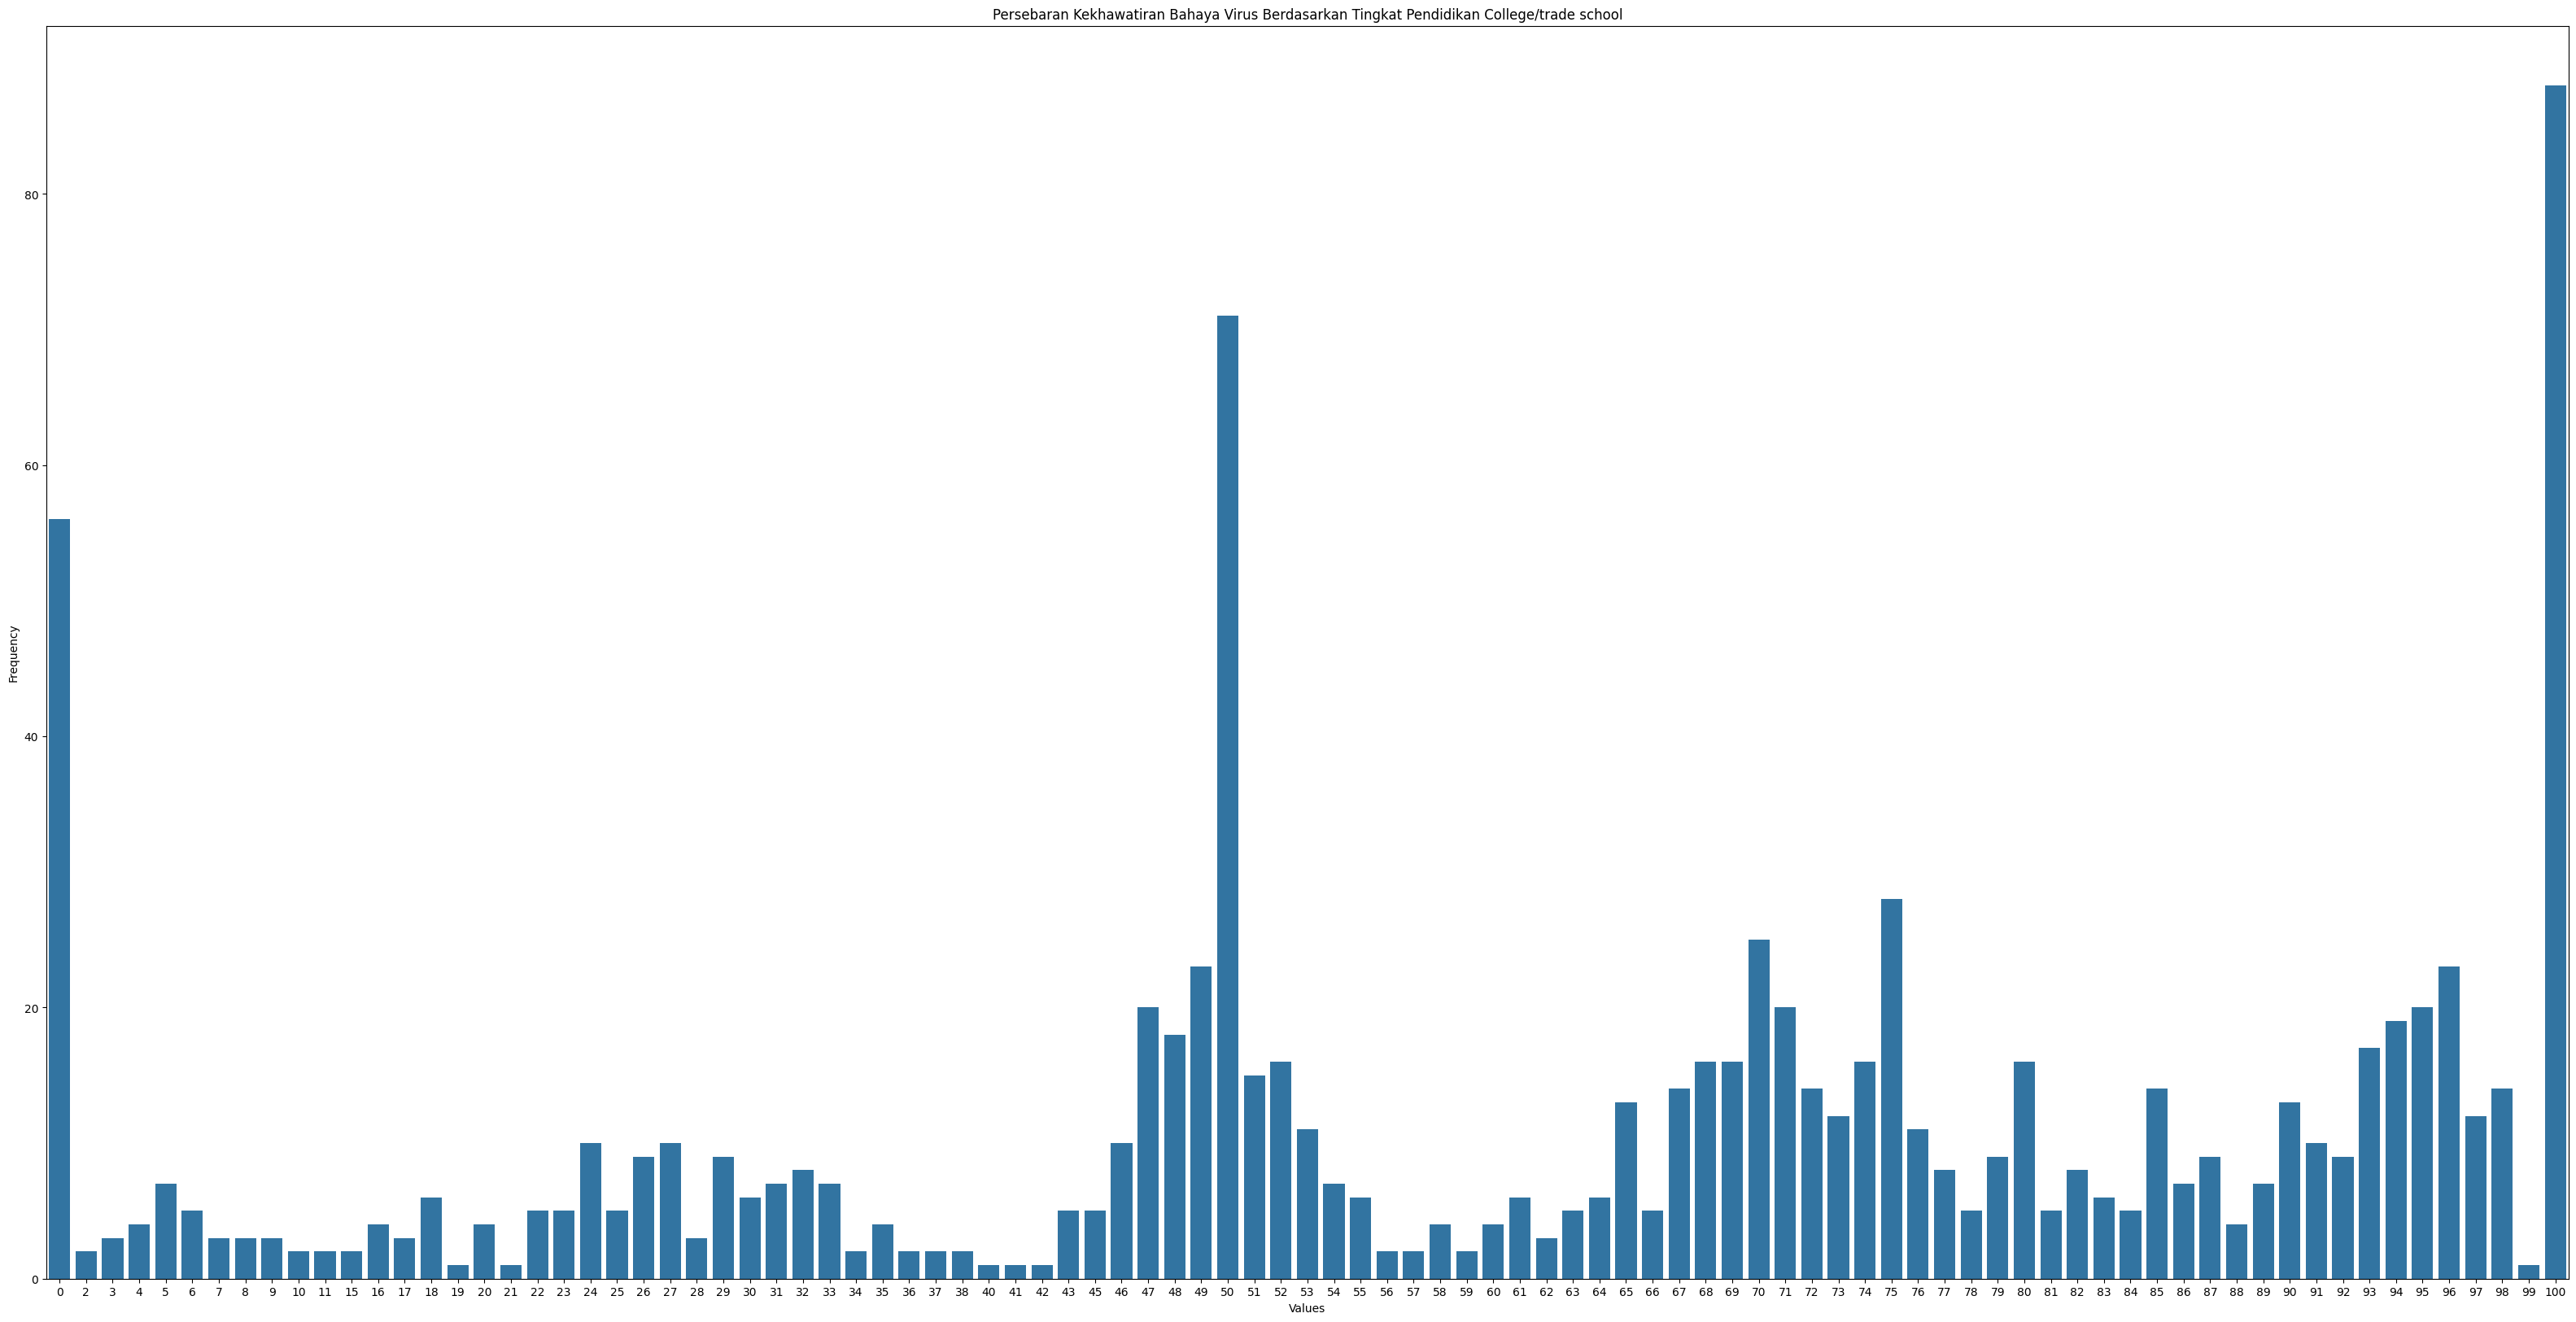

In [33]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbh_college)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan College/trade school')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

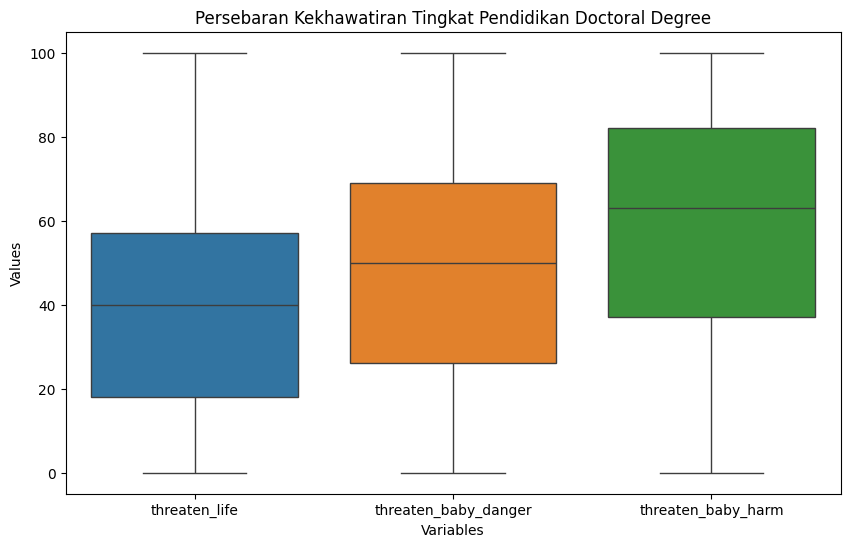

In [34]:
# Memisahkan data
tl_doctoral = train_with_outlier[train_with_outlier['maternal_education'] == "Doctoral Degree"]['threaten_life']
tbd_doctoral = train_with_outlier[train_with_outlier['maternal_education'] == "Doctoral Degree"]['threaten_baby_danger']
tbh_doctoral = train_with_outlier[train_with_outlier['maternal_education'] == "Doctoral Degree"]['threaten_baby_harm']

# Membuat grafik box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=[tl_under, tbd_under, tbh_under])
plt.title('Persebaran Kekhawatiran Tingkat Pendidikan Doctoral Degree')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks([0, 1, 2], ['threaten_life', 'threaten_baby_danger', 'threaten_baby_harm'])  # Mengatur label sumbu x
plt.show()

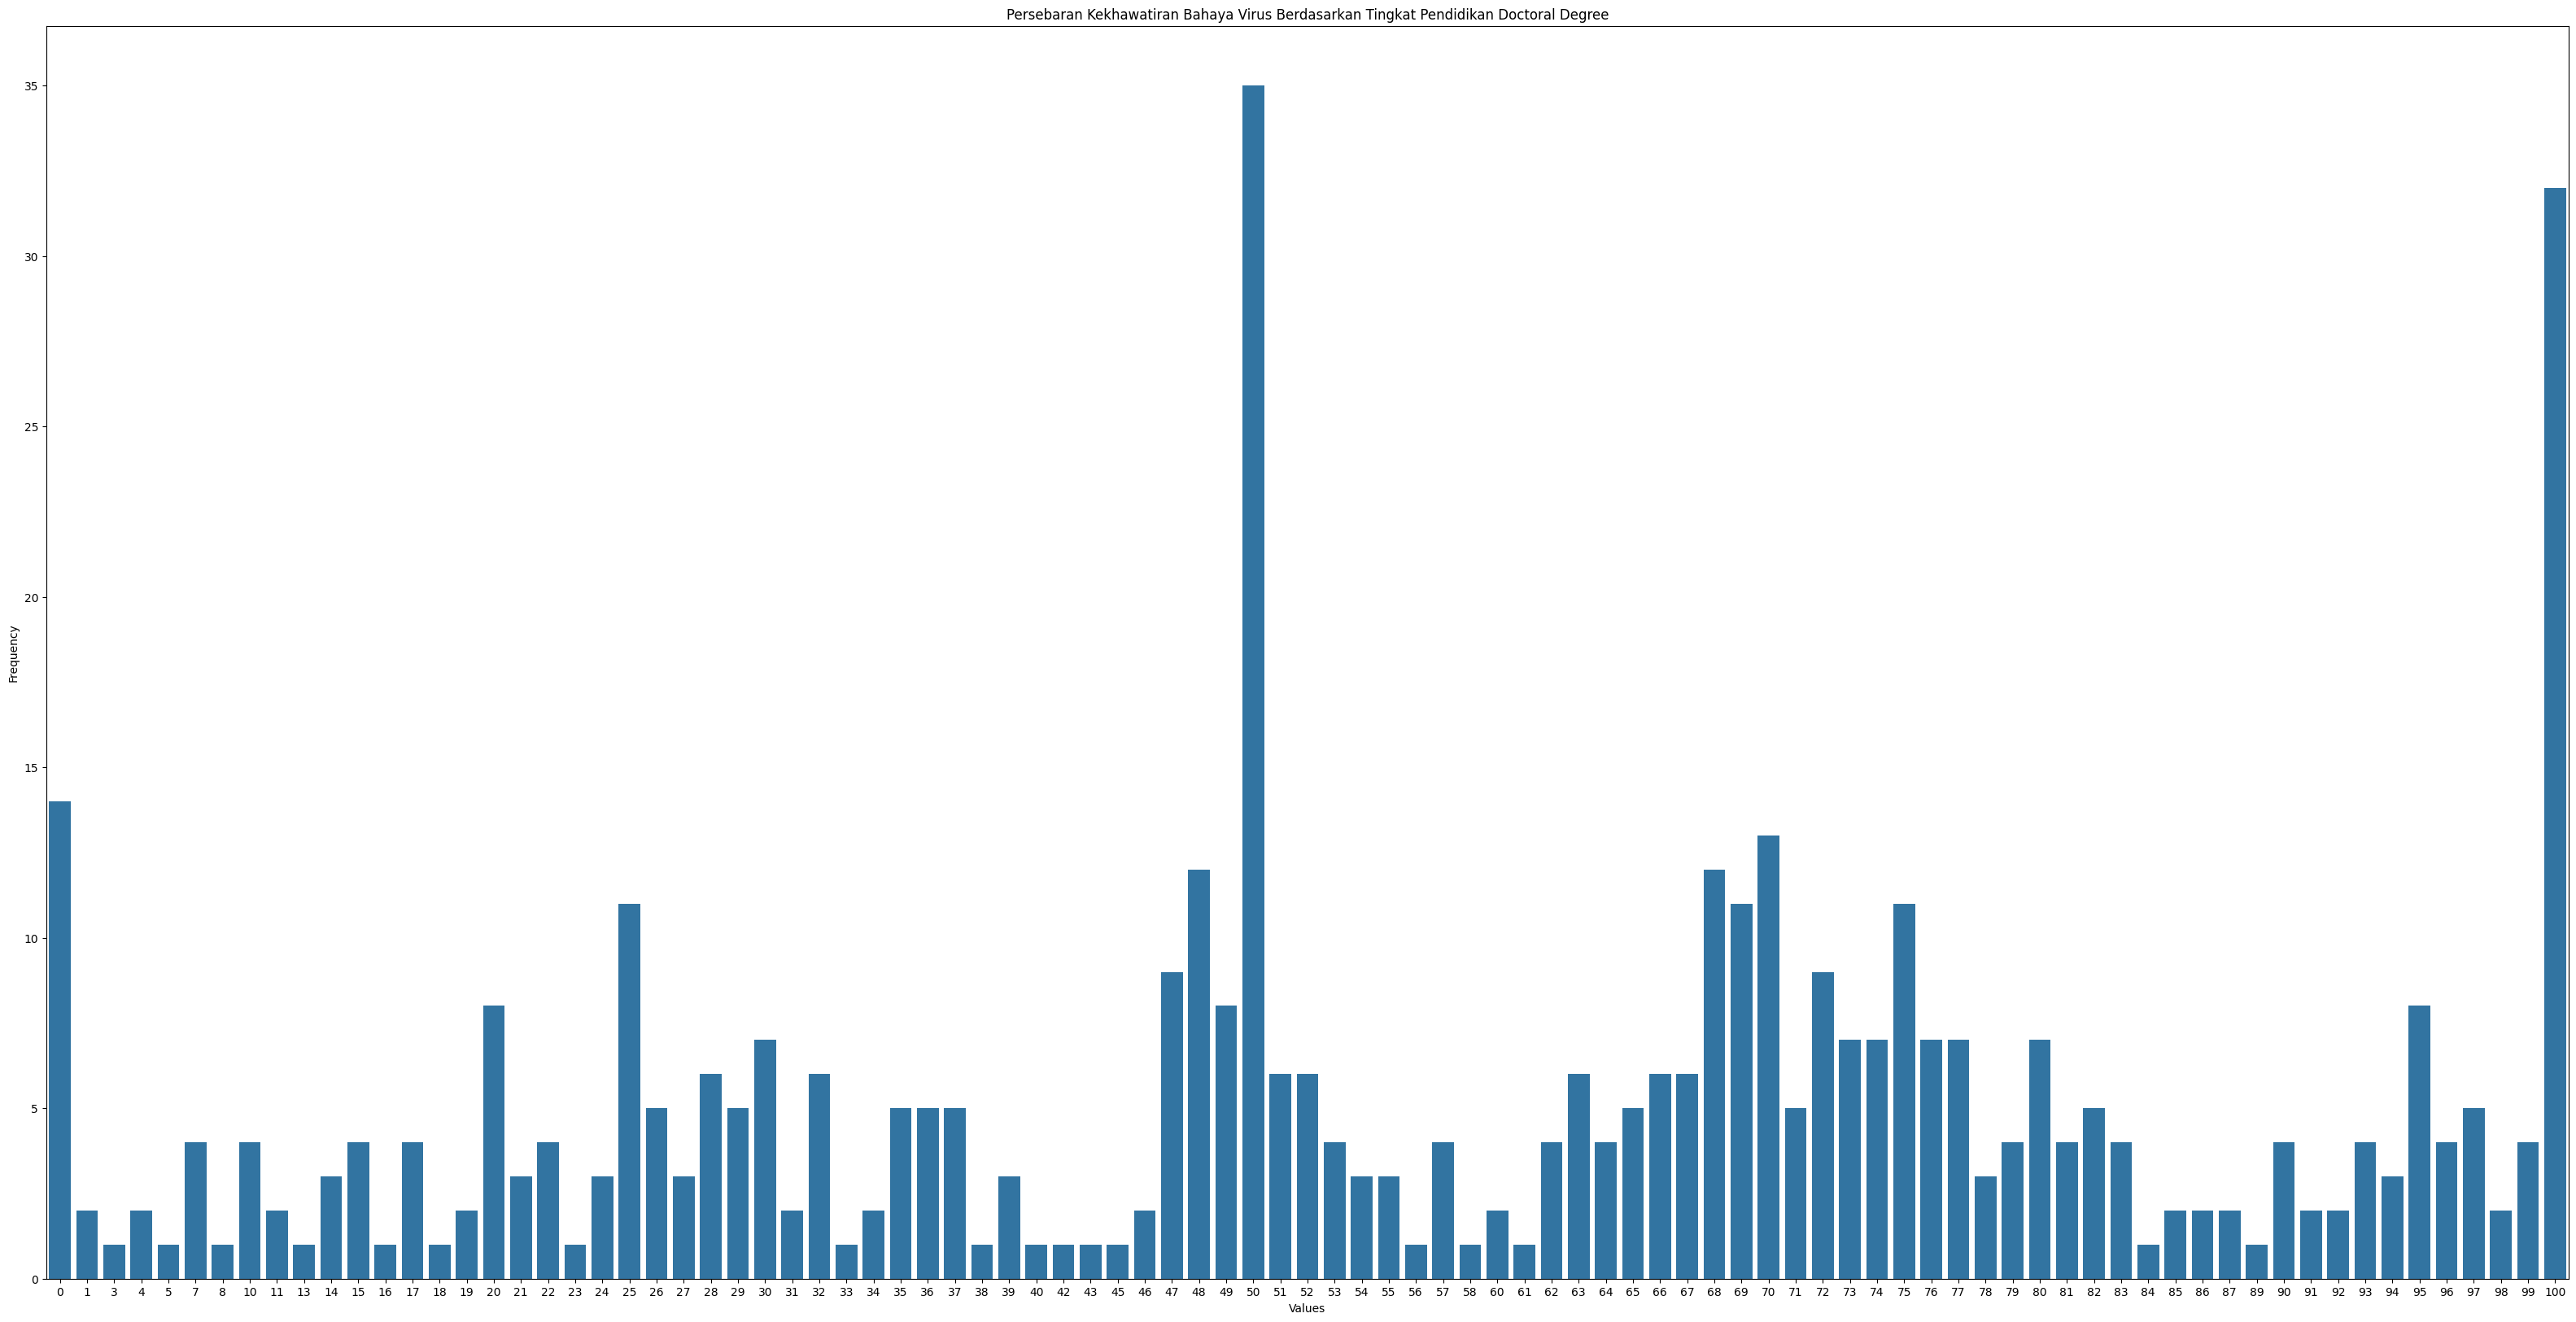

In [35]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbh_doctoral)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan Doctoral Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

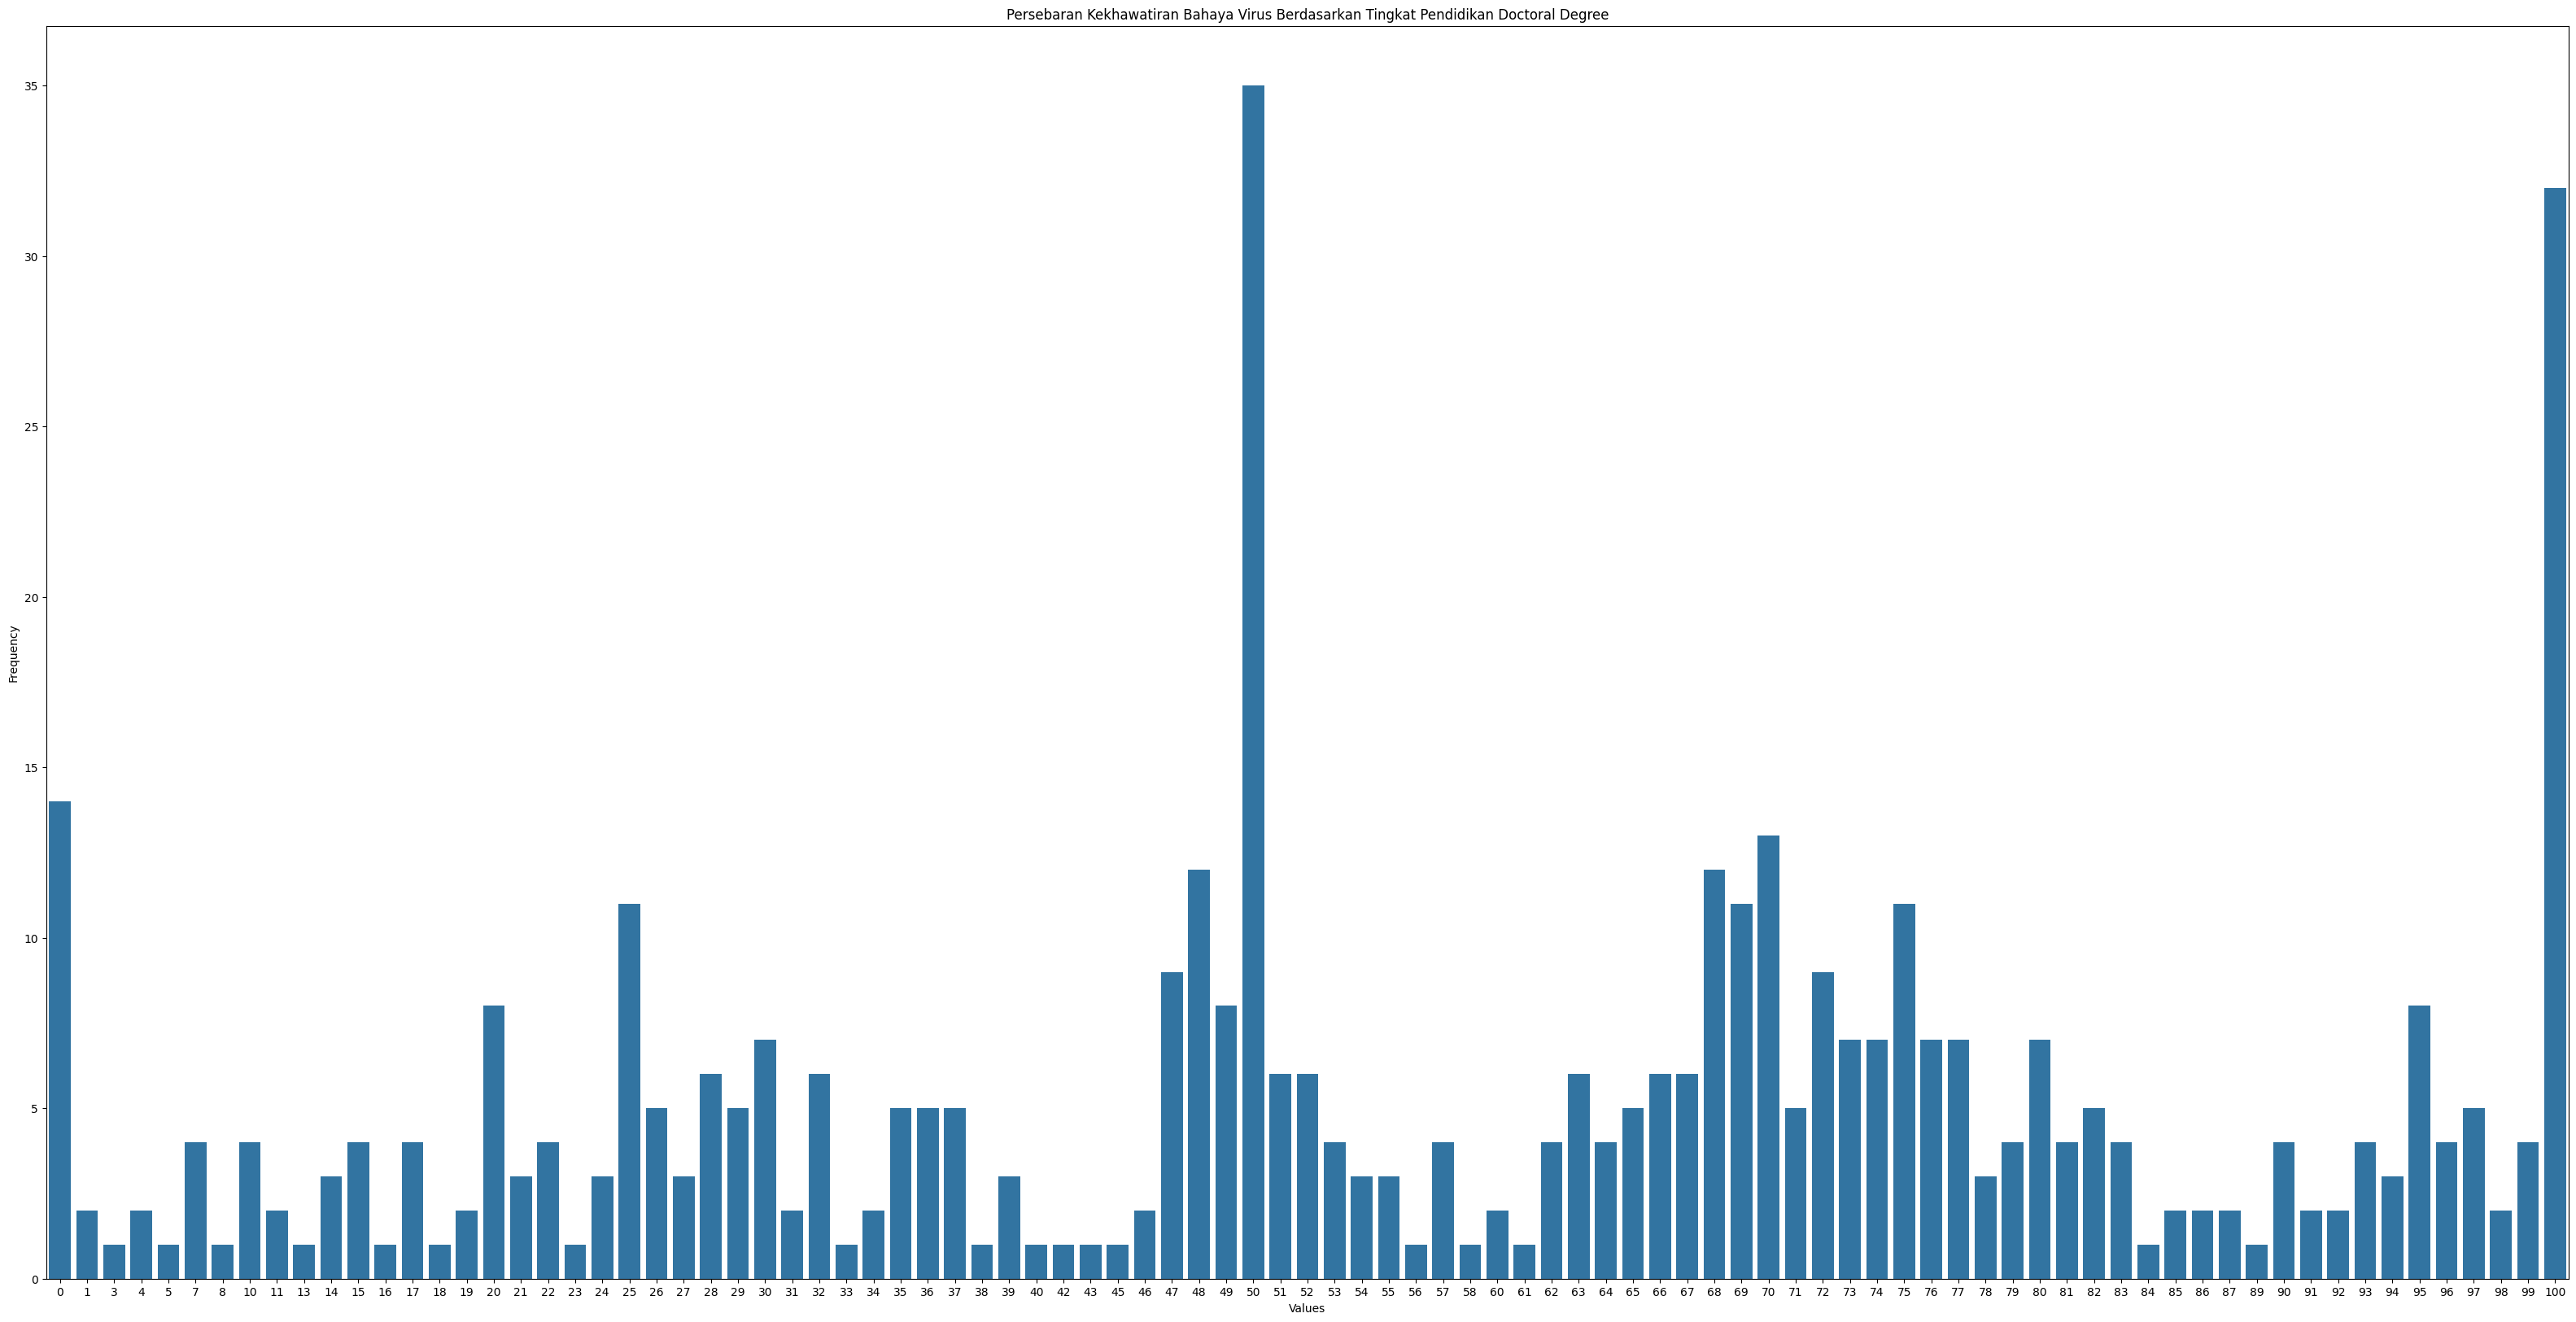

In [36]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbh_doctoral)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan Doctoral Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

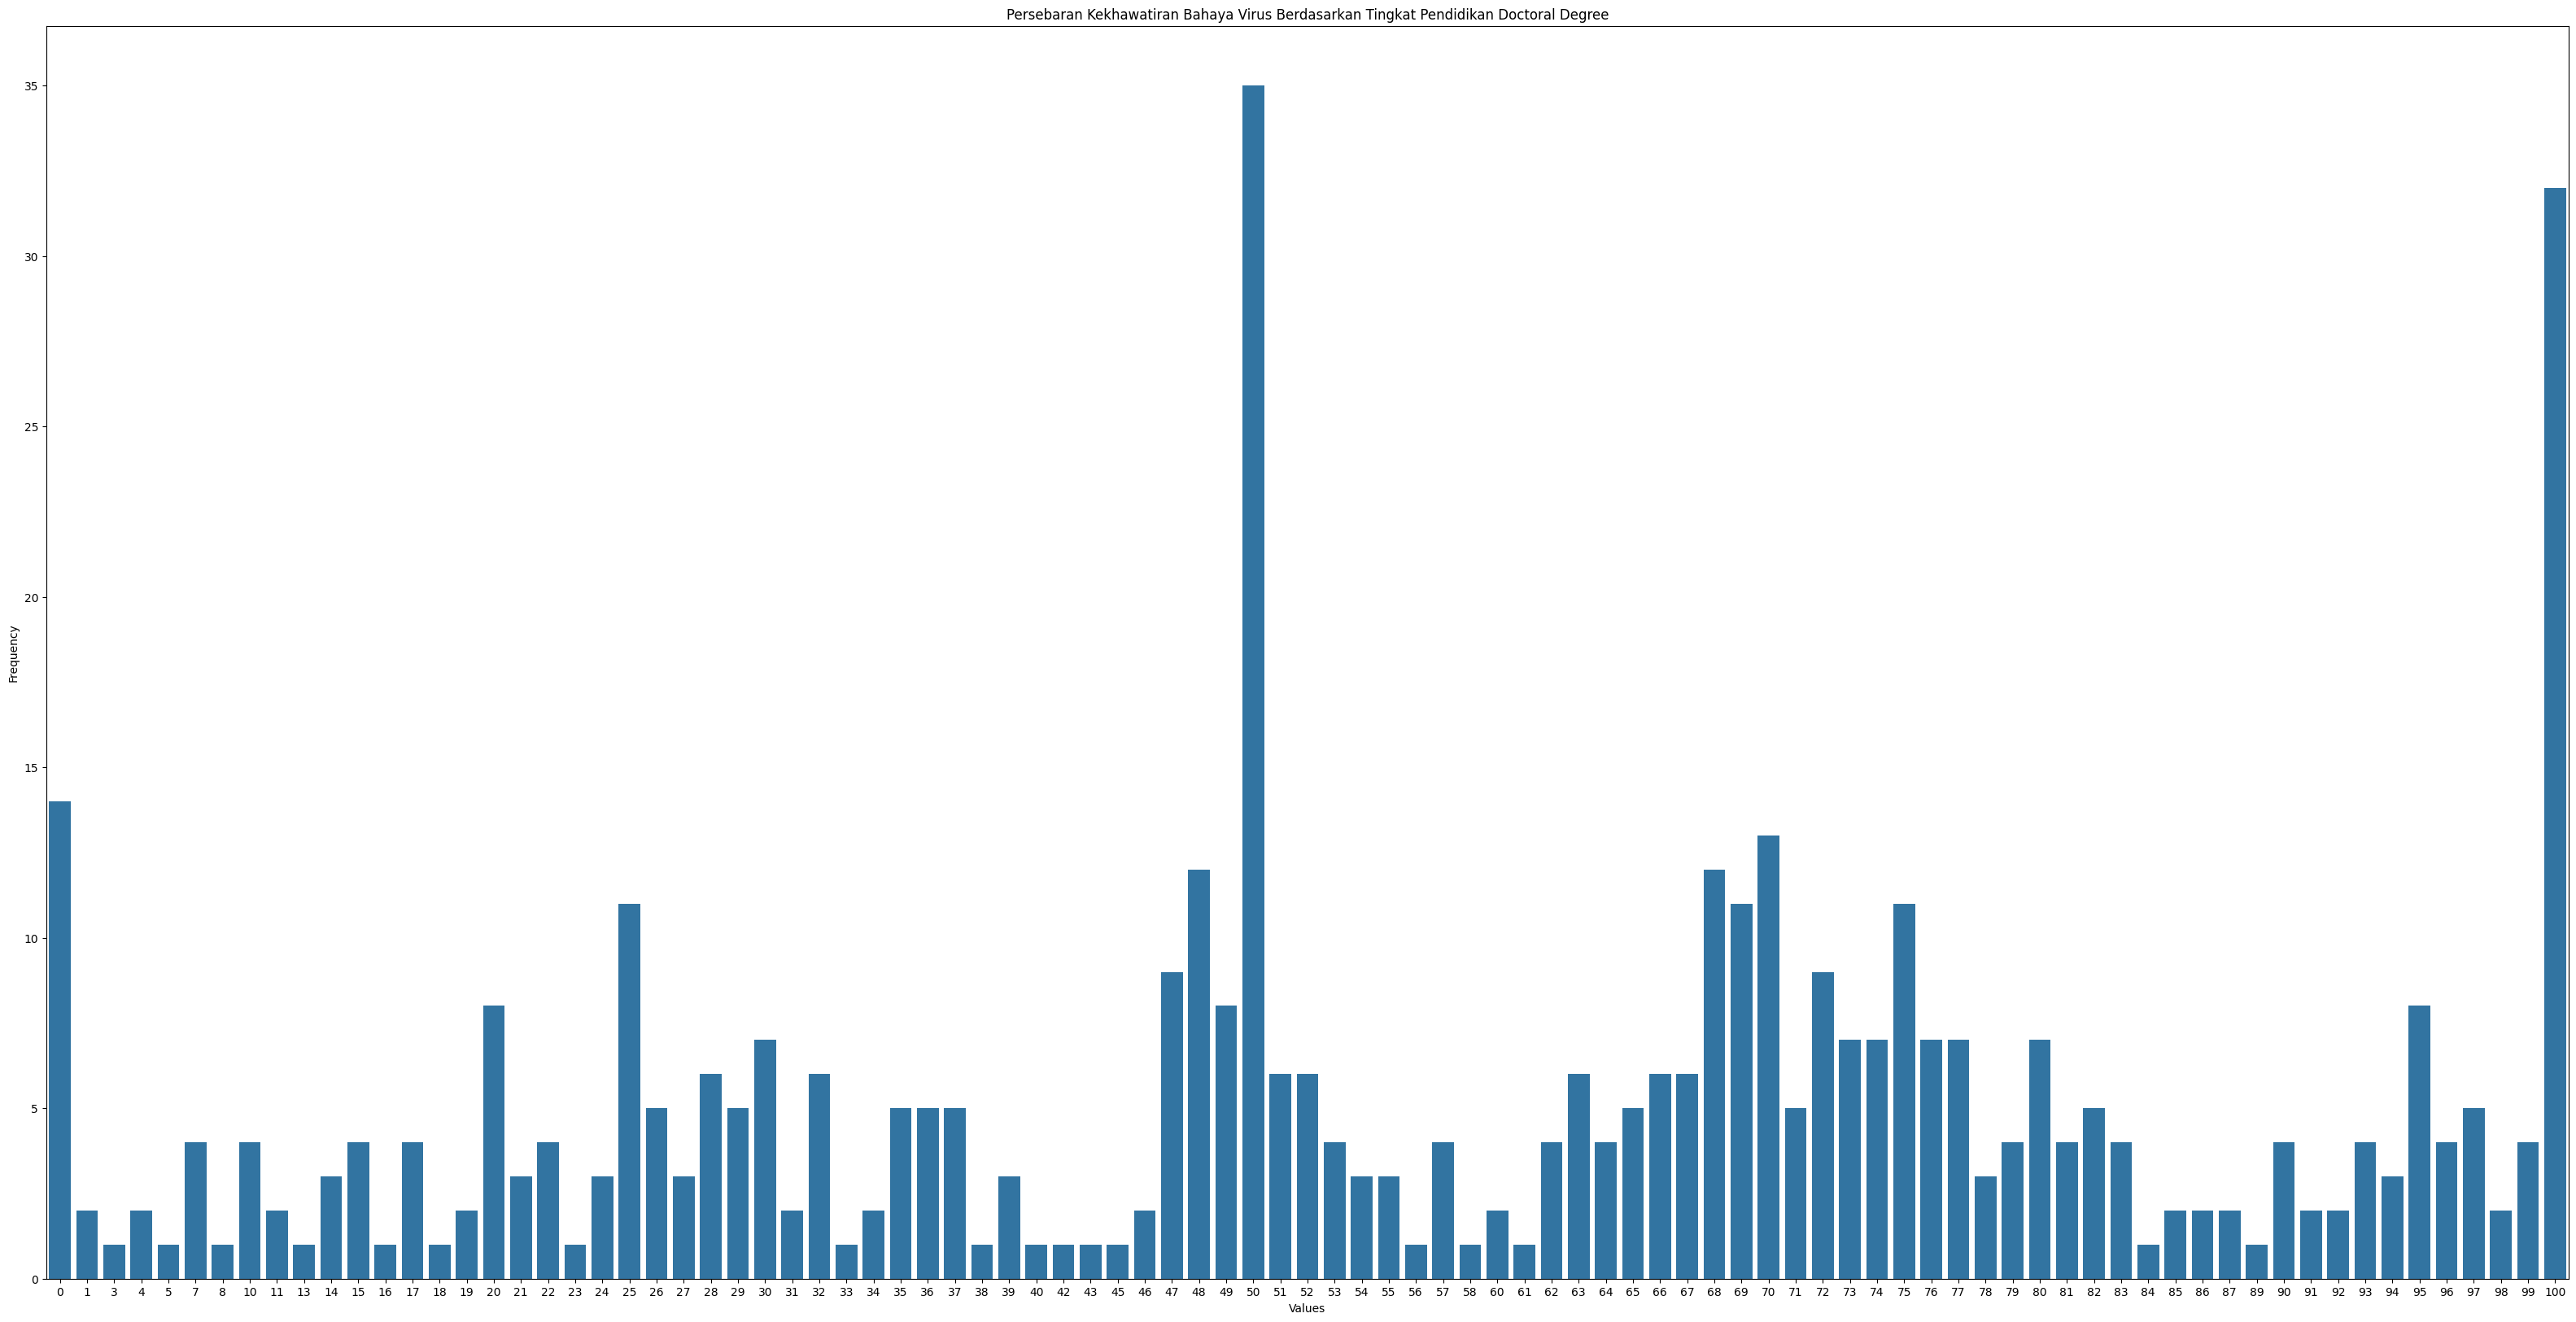

In [37]:
plt.figure(figsize=(40, 20))
sns.countplot(x=tbh_doctoral)
plt.title('Persebaran Kekhawatiran Bahaya Virus Berdasarkan Tingkat Pendidikan Doctoral Degree')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

### Eksplorasi Pertanyaan 4

Pertanyaan 4: Apa bulan-tahun dengan titik awal kehamilan terbanyak?

In [38]:
# mengubah tipe data kolom delivery_date dari float menjadi datetime
train_gestational = pd.to_numeric(train_with_outlier['gestational_age_at_birth'], errors='coerce')
train_month_year = pd.to_datetime(train_with_outlier['delivery_date'], format='%b%Y')

In [39]:
# menghitung titik awal kehamilan
titik_awal_kehamilan = train_month_year - pd.to_timedelta(train_gestational, unit='W')
titik_awal_kehamilan

0      2019-12-30 23:16:48
1      2020-03-20 23:31:12
2      2019-09-18 23:31:12
3      2019-07-29 00:14:24
4      2020-02-11 00:43:12
               ...        
4700   2020-01-22 00:28:48
4701   2020-05-29 23:16:48
4702   2019-08-29 23:45:36
4703   2019-08-19 00:00:00
4704   2020-01-26 00:00:00
Length: 4705, dtype: datetime64[ns]

In [40]:
# mengubah titik awal kehamilan menjadi format month-year
titik_awal_kehamilan_month_year = titik_awal_kehamilan.dt.to_period('M')

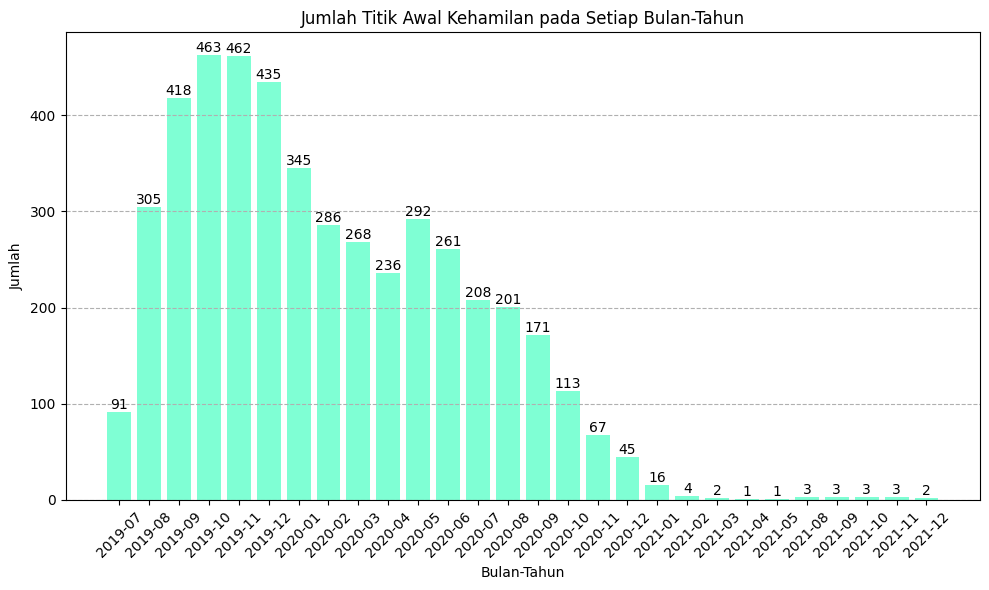

In [41]:
# menghitung jumlah kehamilan untuk setiap titik
titik_awal_kehamilan_count = titik_awal_kehamilan_month_year.value_counts().sort_index()

# membuat bar chart berdasarkan data
plt.figure(figsize=(10, 6))
bars = plt.bar(titik_awal_kehamilan_count.index.astype(str), titik_awal_kehamilan_count, color='aquamarine')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{bar.get_height()}',
             ha='center',
             va='bottom')
plt.title('Jumlah Titik Awal Kehamilan pada Setiap Bulan-Tahun')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

Dapat diketahui berdasarkan data bahwa titik awal kehamilan terbanyak adalah pada bulan September 2019 dengan 463 kehamilan. 4 bulan dengan titik awal terbanyak adalah pada bulan Agustus sampai November 2019. Sementara itu, seiring dengan berjalannya waktu, jumlah awal kehamilan semakin menurun. Mulai dari bulan September 2020, jumlah awal kehamilan menurun hingga di bawah 100 dan semakin mengalami penurunan pada tahun 2021 hingga turun di bawah 10.

### Eksplorasi Tambahan 1

Pertanyaan:

### Eksplorasi Tambahan 2

Pertanyaan:

## [Jawaban] Pembuatan Model

### Model Klasifikasi

### Model Regresi

### Model Clustering